In [2]:
#import libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# read_csv function

folder_name = 'Aleg'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Company test\Company-test\{}'.format(folder_name)

def read_csv_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_csv('{}.csv'.format(file_name), sep=',', low_memory=False, on_bad_lines='skip')
    return df


## 1

In [55]:
df_mrr = read_csv_fun('Aleg','mrr', dir)
print(df_mrr.head(5))

  planname                   month  total_companies     mrr
0     pyme  2019-01-01 00:00:00-05                2    6.67
1     plus  2019-02-01 00:00:00-05               11  326.67
2      pro  2019-02-01 00:00:00-05               21  100.00
3     pyme  2019-02-01 00:00:00-05               39  248.33
4     plus  2019-03-01 00:00:00-05               24  586.67


In [56]:
print(df_mrr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   planname         136 non-null    object 
 1   month            136 non-null    object 
 2   total_companies  136 non-null    int64  
 3   mrr              136 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.4+ KB
None


C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\3173836379.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


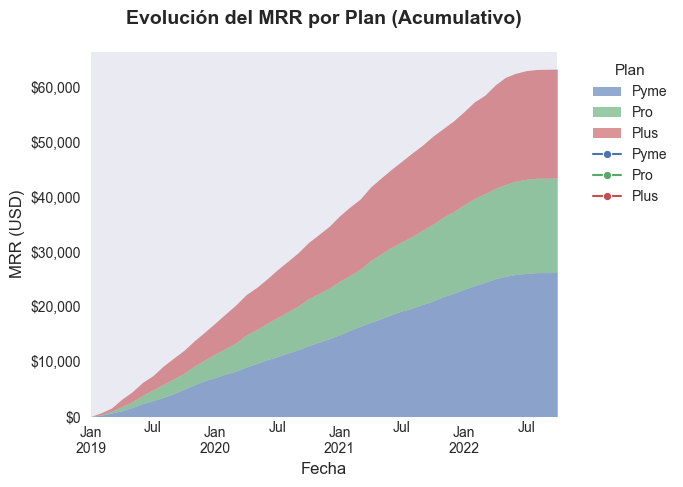

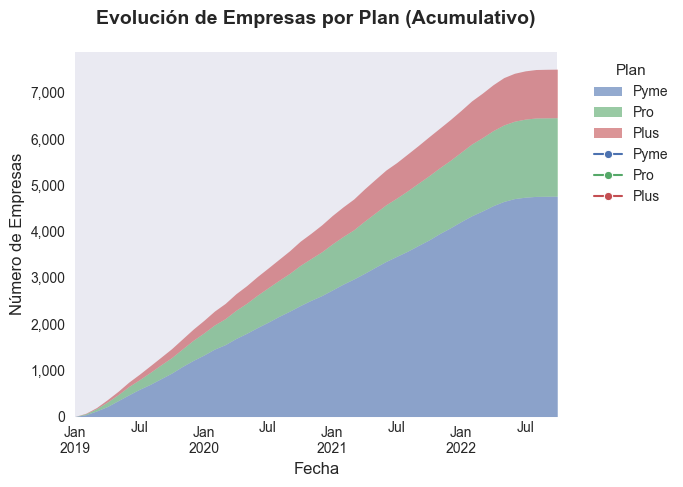

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración estética profesional
plt.style.use('seaborn')
palette = sns.color_palette("deep")
custom_palette = {
    'Pyme': palette[0],  # Azul oscuro
    'Pro': palette[2],   # Verde
    'Plus': palette[3]   # Rojo
}
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# Preparación de datos
df_mrr['month'] = pd.to_datetime(df_mrr['month'])
df_mrr['planname'] = df_mrr['planname'].str.capitalize()

## 1. Gráfico de Área Apilada - MRR
plt.figure(figsize=(7, 5))
ax = plt.gca()

# Crear un DataFrame pivote para el área apilada
df_pivot = df_mrr.pivot_table(index='month', columns='planname', values='mrr', aggfunc='sum').fillna(0)

# Ordenar los planes de menor a mayor (para mejor visualización del apilado)
plan_order = ['Pyme', 'Pro', 'Plus']
df_pivot = df_pivot[plan_order]

# Gráfico de área apilada
df_pivot.plot.area(ax=ax, color=custom_palette, alpha=0.6, linewidth=0)

# Gráfico de línea con marcadores (encima del área)
for plan in plan_order:
    plan_data = df_mrr[df_mrr['planname'] == plan]
    sns.lineplot(data=plan_data, x='month', y='mrr', 
                color=custom_palette[plan], linewidth=1.5, 
                marker='o', markersize=6, label=plan, ax=ax)

plt.title('Evolución del MRR por Plan (Acumulativo)', pad=20)
plt.xlabel('Fecha')
plt.ylabel('MRR (USD)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Leyenda mejorada
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Plan', 
         frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')

# Estilo limpio
ax.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

## 2. Gráfico de Área Apilada - Empresas
plt.figure(figsize=(7, 5))
ax = plt.gca()

# DataFrame pivote para empresas
df_pivot_companies = df_mrr.pivot_table(index='month', columns='planname', 
                                       values='total_companies', aggfunc='sum').fillna(0)
df_pivot_companies = df_pivot_companies[plan_order]

# Área apilada
df_pivot_companies.plot.area(ax=ax, color=custom_palette, alpha=0.6, linewidth=0)

# Líneas con marcadores
for plan in plan_order:
    plan_data = df_mrr[df_mrr['planname'] == plan]
    sns.lineplot(data=plan_data, x='month', y='total_companies', 
                color=custom_palette[plan], linewidth=1.5,
                marker='o', markersize=6, label=plan, ax=ax)

plt.title('Evolución de Empresas por Plan (Acumulativo)', pad=20)
plt.xlabel('Fecha')
plt.ylabel('Número de Empresas')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Plan',
         frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')

# Estilo limpio
ax.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

In [63]:
# Preparar datos para tabla resumen
latest_month = df_mrr['month'].max()
summary = df_mrr[df_mrr['month'] == latest_month].copy()

# Calcular MRR por empresa solo para filas con empresas > 0
summary['mrr_per_company'] = summary.apply(
    lambda x: x['mrr'] / x['total_companies'] if x['total_companies'] > 0 else 0, 
    axis=1
)

# Crear tabla resumen sin formato condicional
print("📊 Resumen de Último Mes Disponible:")
display(summary[['planname', 'total_companies', 'mrr', 'mrr_per_company']]
       .sort_values('mrr', ascending=False)
       .assign(
           total_companies=lambda x: x['total_companies'].map('{:,.0f}'.format),
           mrr=lambda x: x['mrr'].map('${:,.2f}'.format),
           mrr_per_company=lambda x: x['mrr_per_company'].map('${:,.2f}'.format)
       ))

📊 Resumen de Último Mes Disponible:


,planname,total_companies,mrr,mrr_per_company
135,Pyme,"4,763","$26,238.33",$5.51
133,Plus,"1,049","$19,840.00",$18.91
134,Pro,"1,695","$17,190.00",$10.14


In [58]:
# Calcular métricas de crecimiento
latest_month = df_total['month'].max()
growth_6m = (df_total[df_total['month'] == latest_month]['mrr'].values[0] / 
             df_total[df_total['month'] == latest_month - pd.DateOffset(months=6)]['mrr'].values[0] - 1) * 100

# Contribución por plan
plan_contribution = df_mrr.groupby('planname')['mrr'].sum().sort_values(ascending=False) / df_total['mrr'].sum() * 100

print(f"📈 Crecimiento del MRR (últimos 6 meses): {growth_6m:.1f}%")
print("\n🔍 Contribución por Plan:")
print(plan_contribution.round(1).astype(str) + '%')

📈 Crecimiento del MRR (últimos 6 meses): 4.8%

🔍 Contribución por Plan:
planname
Pyme    41.2%
Plus    31.8%
Pro     26.9%
Name: mrr, dtype: object


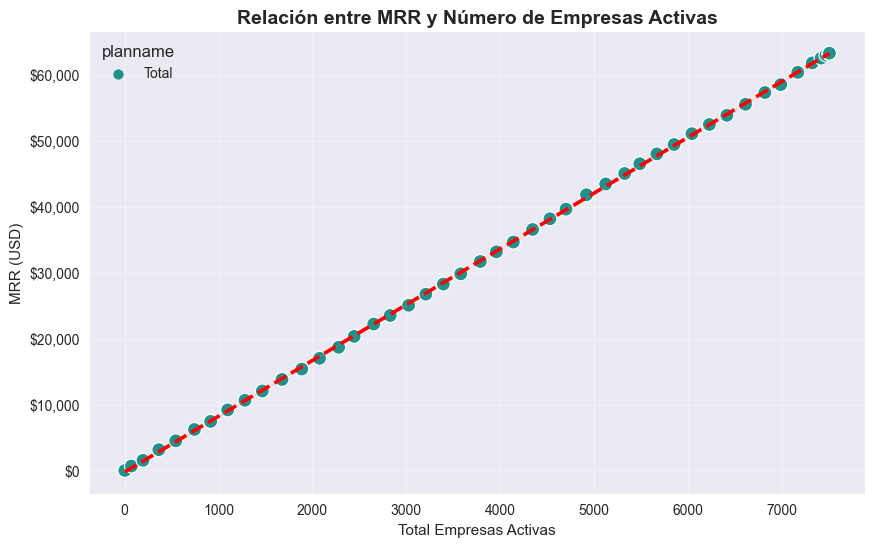

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_total, x='total_companies', y='mrr', hue='planname', palette='viridis', s=100)
sns.regplot(data=df_total, x='total_companies', y='mrr', scatter=False, color='red', line_kws={'linestyle':'--'})
plt.title('Relación entre MRR y Número de Empresas Activas', fontsize=14)
plt.xlabel('Total Empresas Activas')
plt.ylabel('MRR (USD)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(alpha=0.3)
plt.show()

In [67]:
correlacion = df_total[['total_companies', 'mrr']].corr().iloc[0,1]
print(f"Coeficiente de correlación: {correlacion:.2f}")

Coeficiente de correlación: 1.00


<Figure size 1000x400 with 0 Axes>

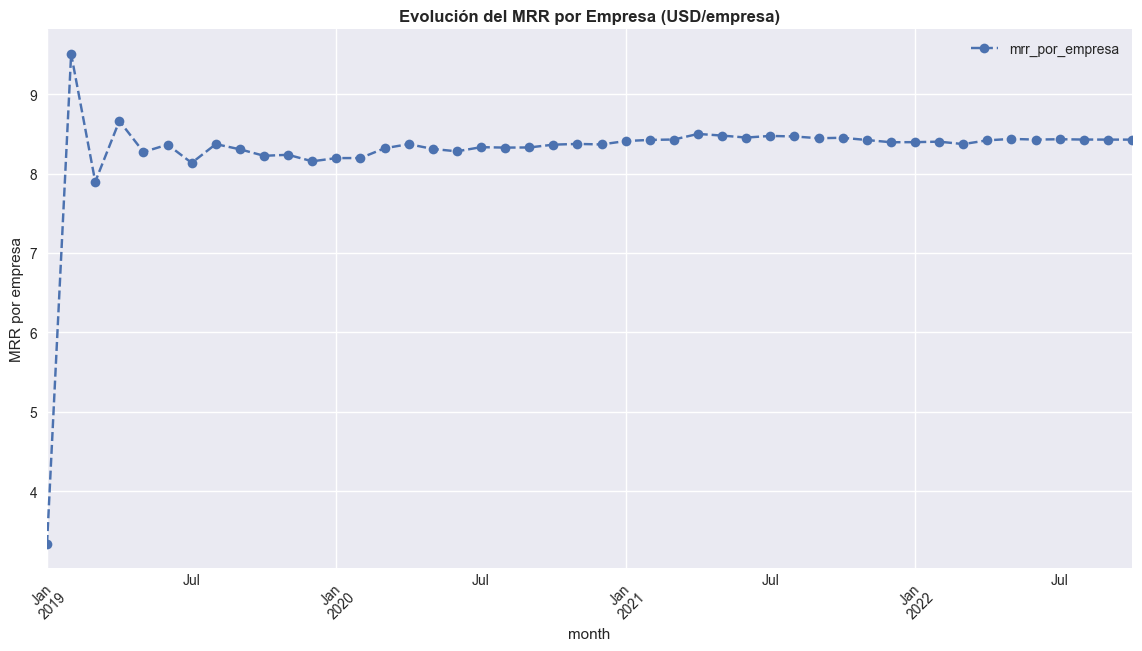

In [68]:
df_total['mrr_por_empresa'] = df_total['mrr'] / df_total['total_companies']
plt.figure(figsize=(10, 4))
df_total.plot(x='month', y='mrr_por_empresa', marker='o', linestyle='--')
plt.title('Evolución del MRR por Empresa (USD/empresa)')
plt.ylabel('MRR por empresa')
plt.xticks(rotation=45)
plt.show()

C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\1710477686.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


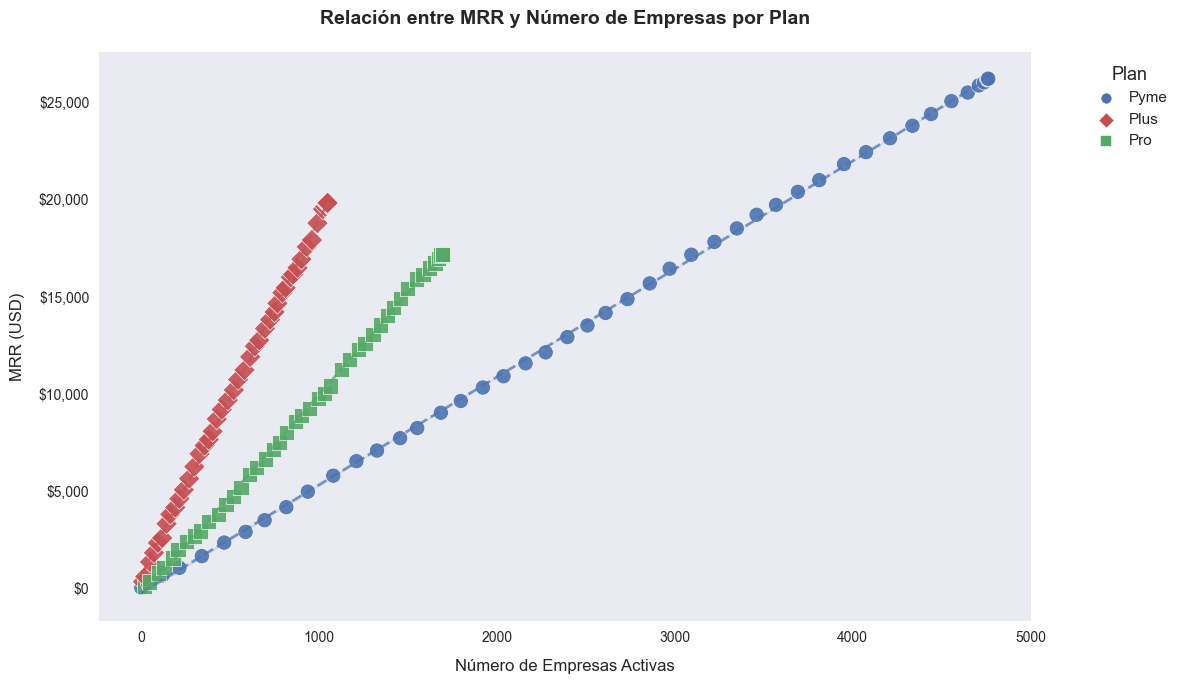

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración estética profesional
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# Paleta de colores mejorada (usando 'deep' de seaborn)
deep_palette = sns.color_palette("deep")
custom_palette = {
    'Pyme': deep_palette[0],  # Azul intenso
    'Pro': deep_palette[2],   # Verde esmeralda
    'Plus': deep_palette[3]   # Rojo coral
}

# Crear el gráfico
fig, ax = plt.subplots()

# Gráfico de dispersión por plan con estilos distintos
scatter = sns.scatterplot(
    data=df_mrr, 
    x='total_companies', 
    y='mrr', 
    hue='planname',
    palette=custom_palette,
    style='planname',  # Diferentes marcadores por plan
    markers={'Pyme': 'o', 'Pro': 's', 'Plus': 'D'},  # Círculo, cuadrado, diamante
    s=120,  # Tamaño de los puntos
    alpha=0.9,
    edgecolor='white',
    linewidth=0.5,
    ax=ax
)

# Líneas de tendencia individuales por plan
for plan, color in custom_palette.items():
    plan_data = df_mrr[df_mrr['planname'] == plan]
    sns.regplot(
        data=plan_data,
        x='total_companies',
        y='mrr',
        scatter=False,
        color=color,
        line_kws={'linestyle': '--', 'alpha': 0.7, 'linewidth': 2},
        ax=ax
    )

# Personalización avanzada
plt.title('Relación entre MRR y Número de Empresas por Plan', fontsize=14, pad=20)
plt.xlabel('Número de Empresas Activas', fontsize=12, labelpad=10)
plt.ylabel('MRR (USD)', fontsize=12, labelpad=10)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Eliminar cuadrícula completamente
ax.grid(False)

# Leyenda mejorada
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    handles[:3], 
    labels[:3],
    title='Plan',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False,
    title_fontsize='13',
    fontsize='11',
    handletextpad=0.5
)


# Estilo final profesional
sns.despine(ax=ax, left=False, bottom=False)  # Conservar solo ejes X e Y
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [70]:
# Calcular correlaciones por plan
print("📊 Coeficientes de Correlación por Plan:")
for plan in df_mrr['planname'].unique():
    plan_data = df_mrr[df_mrr['planname'] == plan]
    corr = plan_data[['total_companies', 'mrr']].corr().iloc[0,1]
    print(f"- {plan}: {corr:.2f}")

# Calcular MRR promedio por empresa por plan
print("\n💵 MRR Promedio por Empresa por Plan:")
for plan in df_mrr['planname'].unique():
    plan_data = df_mrr[df_mrr['planname'] == plan]
    avg_mrr_per_company = (plan_data['mrr'] / plan_data['total_companies']).mean()
    print(f"- {plan}: ${avg_mrr_per_company:.2f} por empresa")

📊 Coeficientes de Correlación por Plan:
- Pyme: 1.00
- Plus: 1.00
- Pro: 1.00

💵 MRR Promedio por Empresa por Plan:
- Pyme: $5.35 por empresa
- Plus: $20.48 por empresa
- Pro: $9.46 por empresa


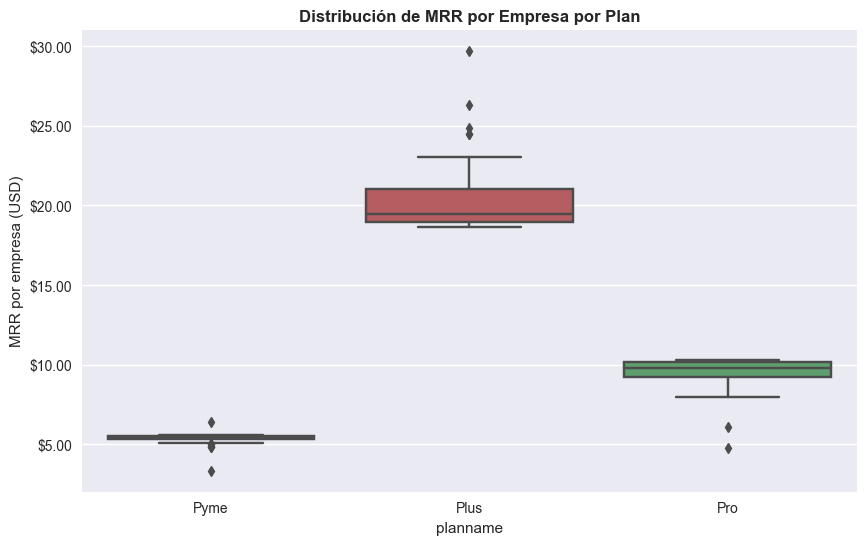

In [71]:
# Boxplot de MRR por empresa por plan
plt.figure(figsize=(10, 6))
df_mrr['mrr_per_company'] = df_mrr['mrr'] / df_mrr['total_companies']
sns.boxplot(data=df_mrr, x='planname', y='mrr_per_company', palette=custom_palette)
plt.title('Distribución de MRR por Empresa por Plan')
plt.ylabel('MRR por empresa (USD)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))
plt.show()

## 2

In [91]:
df_m = read_csv_fun('Aleg','mercados', dir)
print(df_m.head(5))

  country  total_companies     total_mrr  avg_invoices  avg_billing  \
0     COL             6336  26439.166667    629.136679  5522.479482   
1     PER              387    854.166667    557.847545  5476.917313   
2     MEX              390    725.000000    577.497436  5512.066667   
3     PAN              395   1138.333333    633.777215  5359.870886   

   avg_users  avg_downloads  avg_help_requests  new_companies_last_6m  \
0   5.488479       5.014047           5.019097                    271   
1   5.421189       4.777778           4.754522                     12   
2   5.630769       5.189744           5.087179                     12   
3   5.318987       4.903797           4.911392                     20   

   percentage_plus_plan  percentage_digital  percentage_referral  \
0             10.732323           86.868687             6.660354   
1             24.289406            0.000000            46.511628   
2             20.512821            0.000000            50.000000   
3     

In [90]:
print(df_m.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  4 non-null      object 
 1   total_companies          4 non-null      int64  
 2   total_mrr                4 non-null      float64
 3   avg_invoices             4 non-null      float64
 4   avg_billing              4 non-null      float64
 5   avg_users                4 non-null      float64
 6   avg_downloads            4 non-null      float64
 7   avg_help_requests        4 non-null      float64
 8   new_companies_last_6m    4 non-null      int64  
 9   percentage_plus_plan     4 non-null      float64
 10  percentage_digital       4 non-null      float64
 11  percentage_referral      4 non-null      float64
 12  percentage_alternative   4 non-null      float64
 13  percentage_entrepreneur  4 non-null      float64
 14  percentage_accountant    4 non

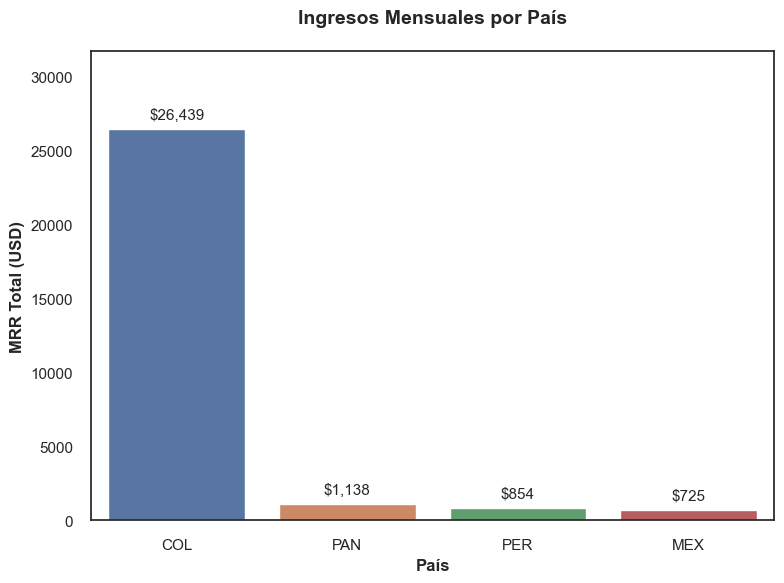

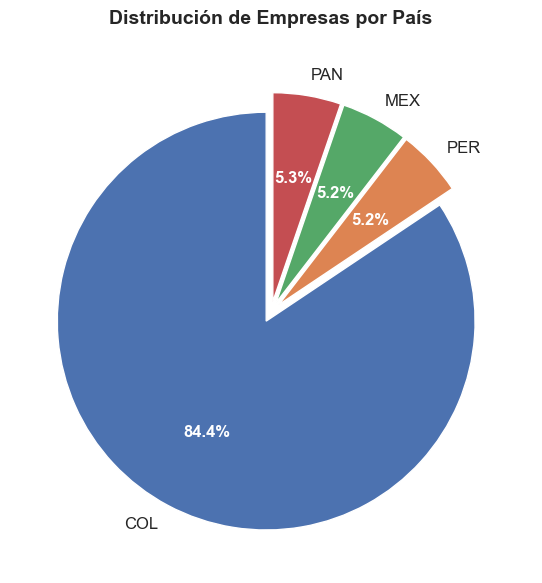

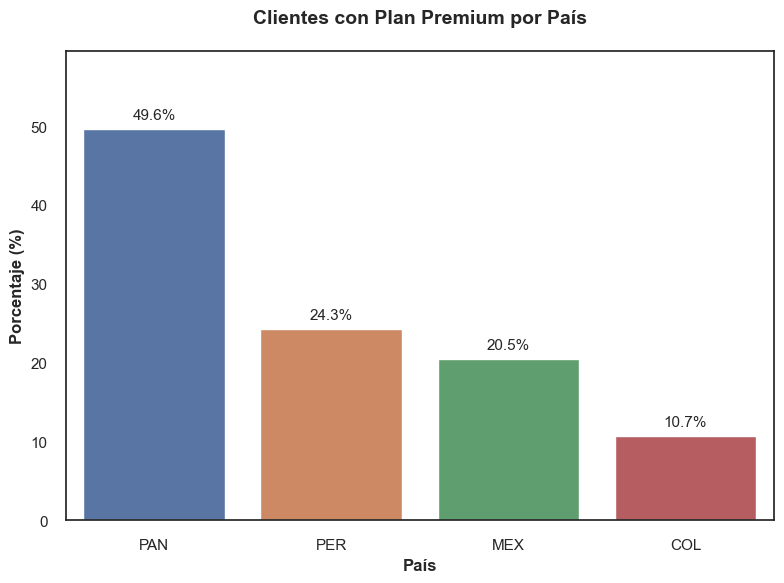

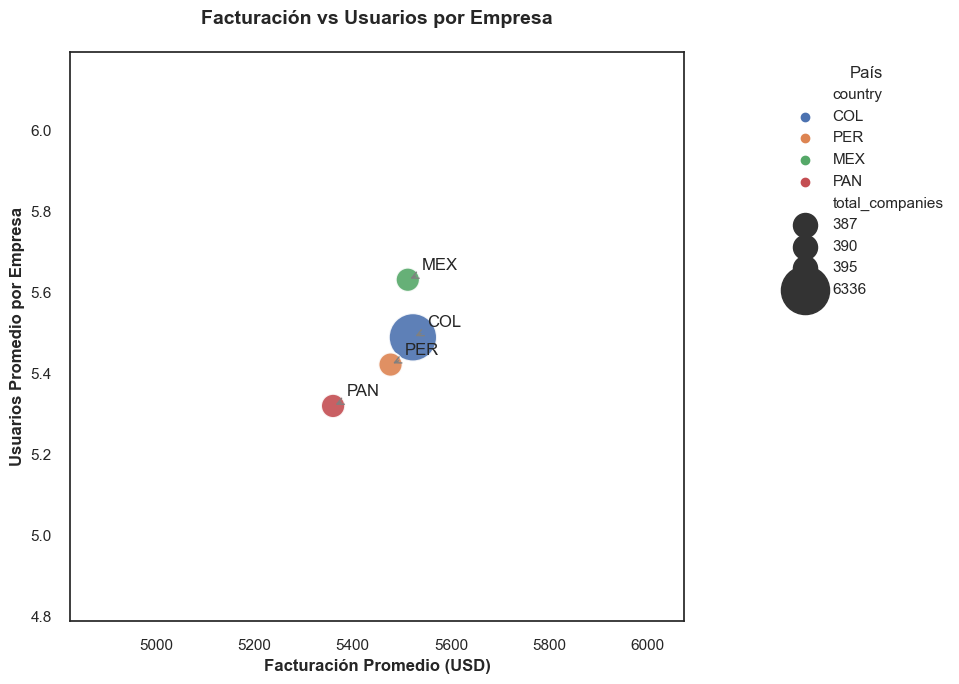

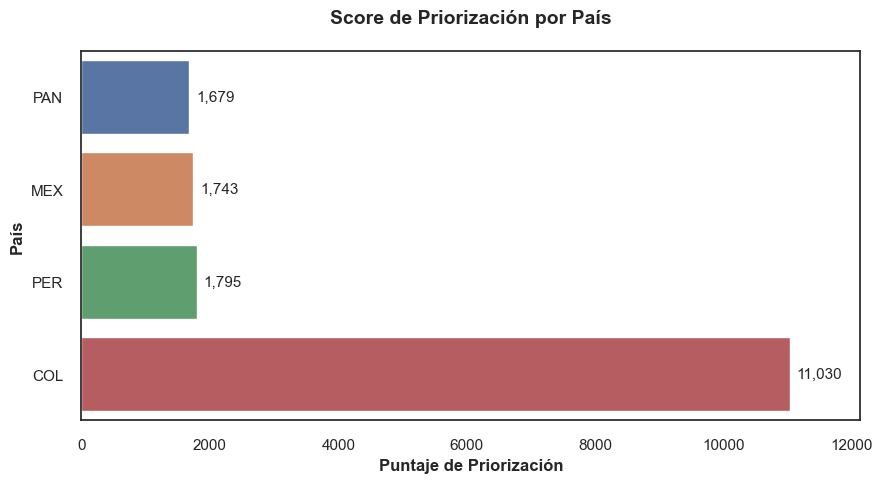

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo mejorada
sns.set_theme(style="white", palette="deep")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlepad'] = 20

## 1. Ingresos Mensuales Recurrentes (MRR) - Barras
plt.figure(figsize=(8, 6))  # Más alto
ax = sns.barplot(data=df_m, x='country', y='total_mrr', 
                 order=df_m.sort_values('total_mrr', ascending=False)['country'])
plt.title('Ingresos Mensuales por País', fontsize=14, fontweight='bold')
plt.xlabel('País', fontweight='bold')
plt.ylabel('MRR Total (USD)', fontweight='bold')

# Ajustar límites del eje Y (20% más alto que el valor máximo)
max_mrr = df_m['total_mrr'].max()
plt.ylim(0, max_mrr * 1.2)

# Valores con formato monetario
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"${height:,.0f}", 
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=11)
    
plt.tight_layout()
plt.show()

## 2. Distribución de Empresas por País - Diagrama de Torta (reemplazo crecimiento)
plt.figure(figsize=(8, 6))
colors = sns.color_palette("deep")
explode = (0.05, 0.05, 0.05, 0.05)  # Separar ligeramente las porciones

# Calculamos porcentajes
total = df_m['total_companies'].sum()
percentages = df_m['total_companies'] / total * 100

wedges, texts, autotexts = plt.pie(percentages, 
                                   labels=df_m['country'],
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=colors,
                                   explode=explode,
                                   textprops={'fontsize': 12})

plt.title('Distribución de Empresas por País', fontsize=14, fontweight='bold', pad=20)

# Hacer los porcentajes más legibles
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

## 3. Porcentaje de Planes Plus - Barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_m, x='country', y='percentage_plus_plan',
                 order=df_m.sort_values('percentage_plus_plan', ascending=False)['country'])
plt.title('Clientes con Plan Premium por País', fontsize=14, fontweight='bold')
plt.xlabel('País', fontweight='bold')
plt.ylabel('Porcentaje (%)', fontweight='bold')

# Ajustar eje Y
plt.ylim(0, df_m['percentage_plus_plan'].max() * 1.2)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1f}%", 
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=11)

plt.tight_layout()
plt.show()

## 4. Facturación vs Usuarios - Scatter mejorado
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(data=df_m, x='avg_billing', y='avg_users', 
                          hue='country', size='total_companies',
                          sizes=(300, 1200), palette='deep', alpha=0.9)

plt.title('Facturación vs Usuarios por Empresa', fontsize=14, fontweight='bold')
plt.xlabel('Facturación Promedio (USD)', fontweight='bold')
plt.ylabel('Usuarios Promedio por Empresa', fontweight='bold')

# Ajustar límites
plt.xlim(df_m['avg_billing'].min() * 0.9, df_m['avg_billing'].max() * 1.1)
plt.ylim(df_m['avg_users'].min() * 0.9, df_m['avg_users'].max() * 1.1)

# Leyenda mejorada
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', title='País')

# Etiquetas con flechas
for line in range(df_m.shape[0]):
    plt.annotate(df_m.country[line], 
                 (df_m.avg_billing[line], df_m.avg_users[line]),
                 textcoords="offset points", 
                 xytext=(10, 5), ha='left', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='gray'))

plt.tight_layout()
plt.show()

## 5. Score de Priorización - Barras horizontales
plt.figure(figsize=(9, 5))
df_sorted = df_m.sort_values('priority_score', ascending=True)  # Orden ascendente para barras horizontales
ax = sns.barplot(data=df_sorted, y='country', x='priority_score', palette='deep')

plt.title('Score de Priorización por País', fontsize=14, fontweight='bold')
plt.xlabel('Puntaje de Priorización', fontweight='bold')
plt.ylabel('País', fontweight='bold')

# Ajustar eje X
plt.xlim(0, df_m['priority_score'].max() * 1.1)

# Valores simplificados
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{width:,.0f}", 
                (width, p.get_y() + p.get_height()/2.),
                ha='left', va='center', xytext=(5, 0), 
                textcoords='offset points', fontsize=11)

plt.tight_layout()
plt.show()

In [83]:
import plotly.express as px

metrics = ['total_mrr', 'mrr_growth_percentage', 'percentage_plus_plan', 
           'avg_billing', 'avg_days_active']
df_radar = df_m.melt(id_vars=['country'], value_vars=metrics)

fig = px.line_polar(df_radar, r='value', theta='variable', color='country',
                    line_close=True, template='plotly_dark',
                    title='Comparación Multidimensional de Mercados')
fig.show()

C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from 

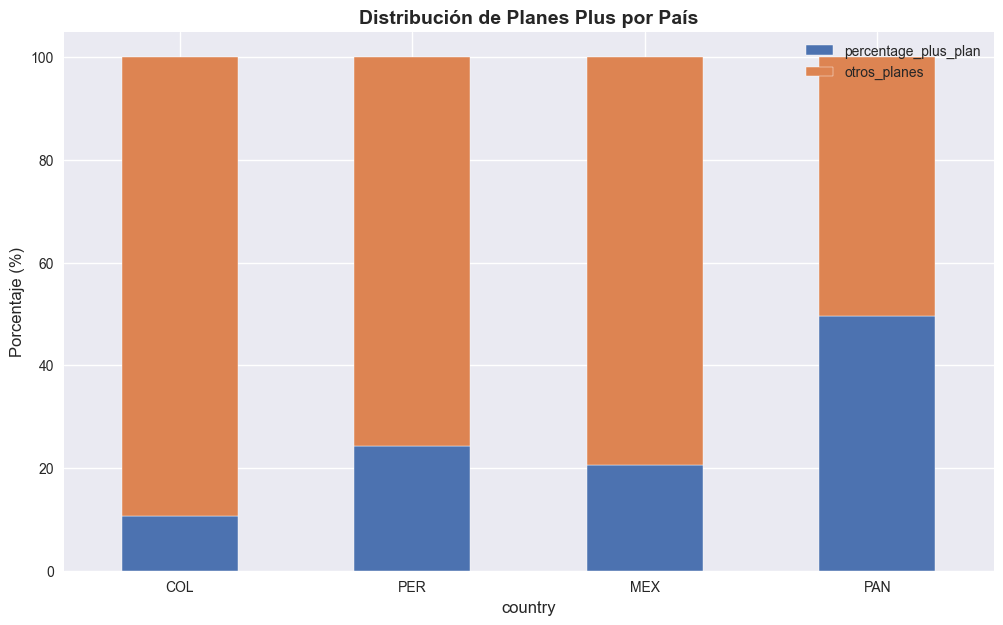

In [84]:
import matplotlib.pyplot as plt

df_plans = df_m[['country', 'percentage_plus_plan']].copy()
df_plans['otros_planes'] = 100 - df_plans['percentage_plus_plan']

ax = df_plans.set_index('country').plot(kind='bar', stacked=True, 
                                       color=['#4C72B0', '#DD8452'])
plt.title('Distribución de Planes Plus por País')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.show()

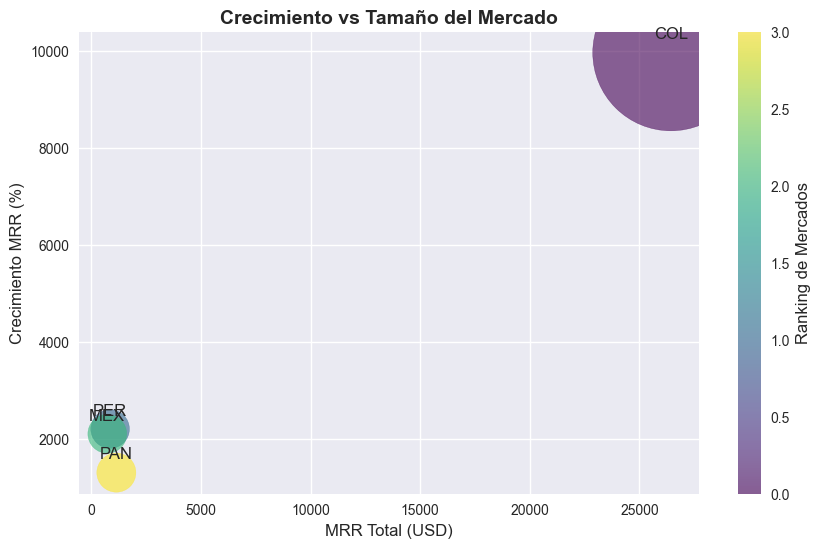

In [85]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_m['total_mrr'], df_m['mrr_growth_percentage'], 
                     s=df_m['total_companies']*2, c=range(len(df_m)), 
                     cmap='viridis', alpha=0.6)

plt.title('Crecimiento vs Tamaño del Mercado')
plt.xlabel('MRR Total (USD)')
plt.ylabel('Crecimiento MRR (%)')
plt.grid(True)

for i, row in df_m.iterrows():
    plt.annotate(row['country'], (row['total_mrr'], row['mrr_growth_percentage']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.colorbar(scatter, label='Ranking de Mercados')
plt.show()

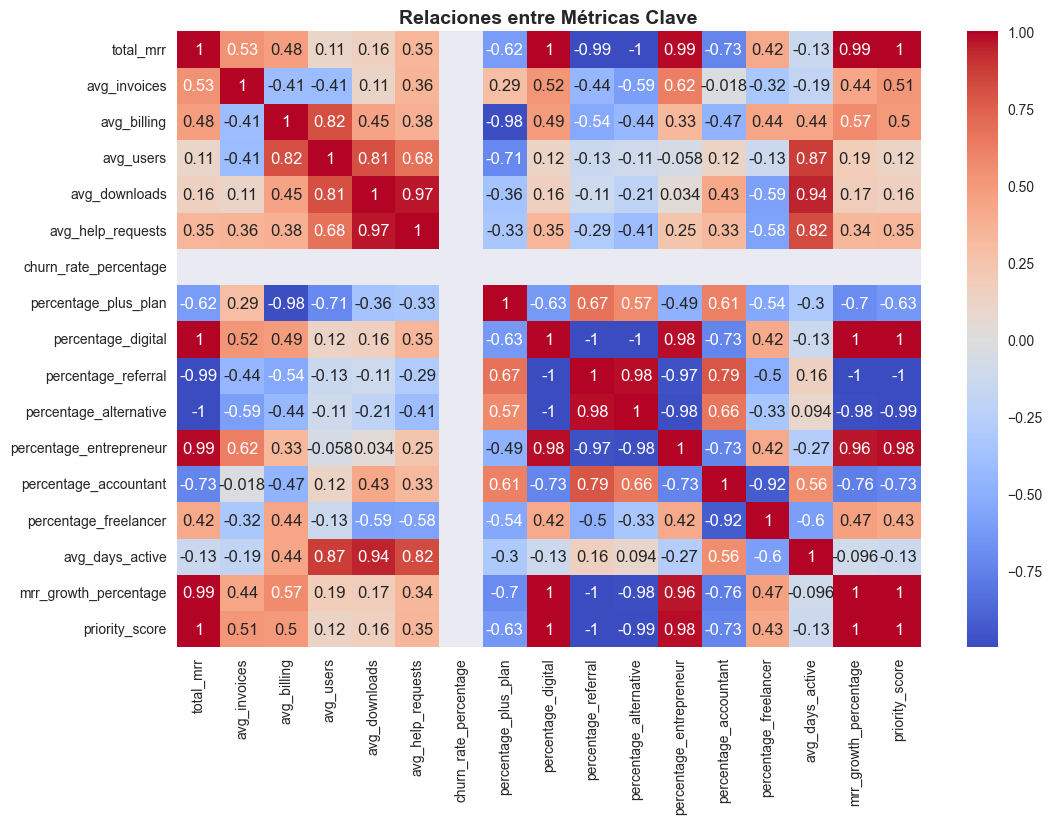

In [86]:
import seaborn as sns

corr_matrix = df_m.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Relaciones entre Métricas Clave')
plt.show()

<Figure size 800x400 with 0 Axes>

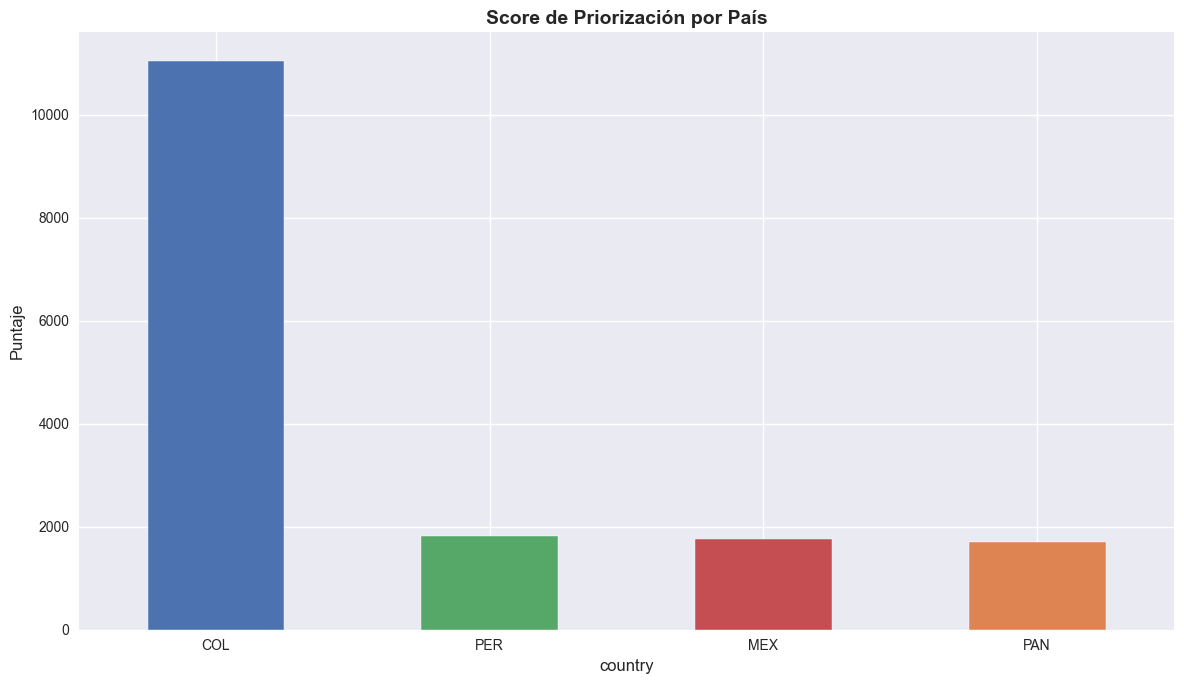

In [88]:
# Gráfico simple de priorización final
plt.figure(figsize=(8, 4))
df_m.sort_values('priority_score', ascending=False).plot.bar(
    x='country', y='priority_score', legend=False,
    color=['#4C72B0', '#55A868', '#C44E52', '#DD8452'])
plt.title('Score de Priorización por País')
plt.ylabel('Puntaje')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3

In [4]:
df_ac = read_csv_fun('Aleg','analisis_cohortes', dir)
print(df_ac.head(5))

             cohort_month                   month  total_companies  \
0  2019-01-01 00:00:00-05  2019-01-01 00:00:00-05              254   
1  2019-01-01 00:00:00-05  2019-02-01 00:00:00-05              254   
2  2019-01-01 00:00:00-05  2019-03-01 00:00:00-05              254   
3  2019-01-01 00:00:00-05  2019-04-01 00:00:00-05              254   
4  2019-01-01 00:00:00-05  2019-05-01 00:00:00-05              254   

   retained_companies  retention_rate  
0                 254      100.000000  
1                 253       99.606299  
2                 252       99.212598  
3                 245       96.456693  
4                 240       94.488189  


In [10]:
df_ac_q = read_csv_fun('Aleg','analisis_cohortes_q', dir)
print(df_ac_q.head(5))

           cohort_quarter cohort_quarter_formatted                 quarter  \
0  2019-01-01 00:00:00-05                  Q1-2019  2019-01-01 00:00:00-05   
1  2019-01-01 00:00:00-05                  Q1-2019  2019-04-01 00:00:00-05   
2  2019-01-01 00:00:00-05                  Q1-2019  2019-07-01 00:00:00-05   
3  2019-01-01 00:00:00-05                  Q1-2019  2019-10-01 00:00:00-05   
4  2019-01-01 00:00:00-05                  Q1-2019  2020-01-01 00:00:00-05   

  quarter_formatted  total_companies  retained_companies  retention_rate  
0           Q1-2019              738                 738      100.000000  
1           Q2-2019              738                 724       98.102981  
2           Q3-2019              738                 687       93.089431  
3           Q4-2019              738                 658       89.159892  
4           Q1-2020              738                 653       88.482385  


In [11]:
print(df_ac_q.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cohort_quarter            105 non-null    object 
 1   cohort_quarter_formatted  105 non-null    object 
 2   quarter                   105 non-null    object 
 3   quarter_formatted         105 non-null    object 
 4   total_companies           105 non-null    int64  
 5   retained_companies        105 non-null    int64  
 6   retention_rate            105 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 5.9+ KB
None


In [15]:
display(
    df_ac_q.value_counts("cohort_quarter_formatted")
)

cohort_quarter_formatted
Q1-2019    14
Q2-2019    13
Q3-2019    12
Q4-2019    11
Q1-2020    10
Q2-2020     9
Q3-2020     8
Q4-2020     7
Q1-2021     6
Q2-2021     5
Q3-2021     4
Q4-2021     3
Q1-2022     2
Q2-2022     1
dtype: int64

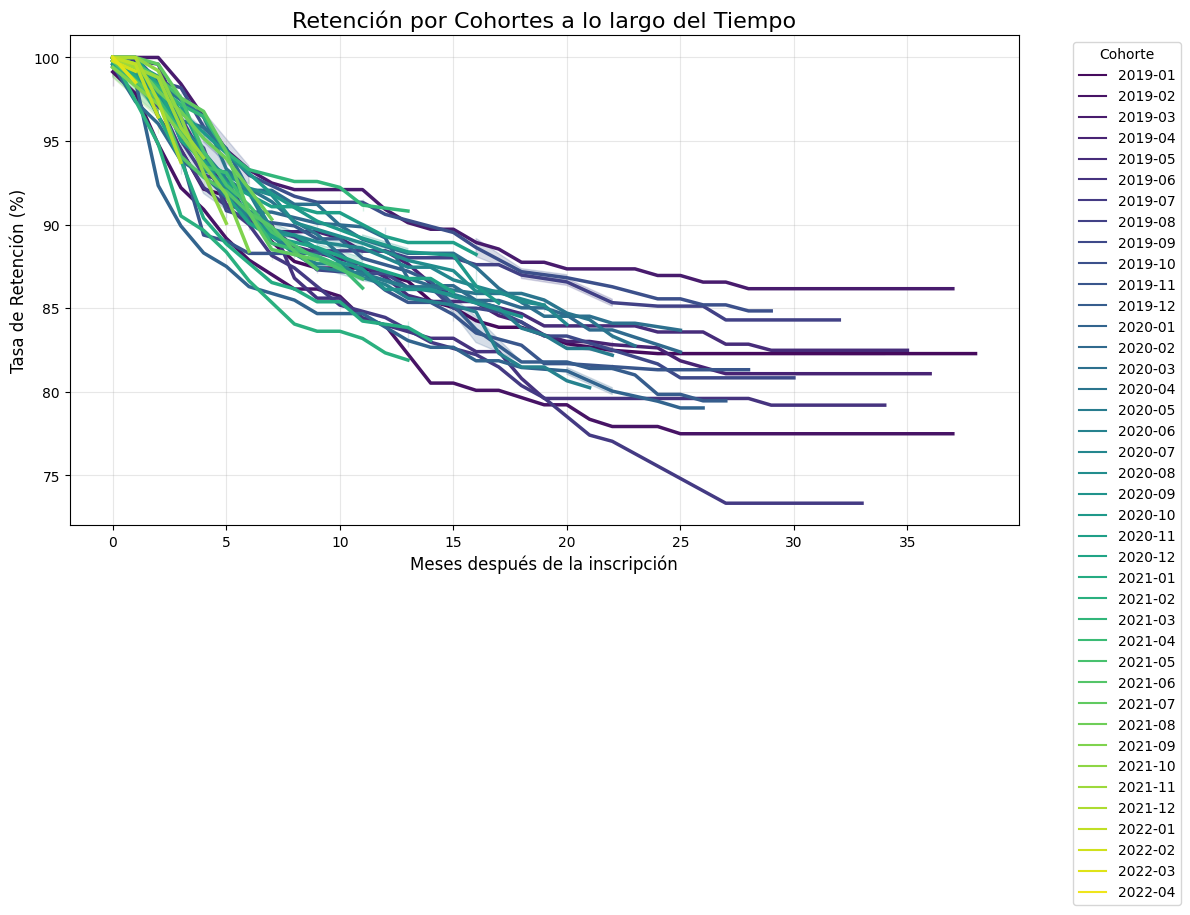

In [7]:
# 1. Convertir las columnas de fecha a datetime
df_ac['cohort_month'] = pd.to_datetime(df_ac['cohort_month'])
df_ac['month'] = pd.to_datetime(df_ac['month'])

# 2. Calcular la diferencia en meses entre cada mes y su cohorte
df_ac['meses_despues'] = ((df_ac['month'] - df_ac['cohort_month']) 
                         / np.timedelta64(1, 'M')).astype(int)

# 3. Crear una columna de identificación del cohorte (opcional, para mejor visualización)
df_ac['cohort_id'] = df_ac['cohort_month'].dt.strftime('%Y-%m')

# 4. Filtrar datos si es necesario (puedes ajustar esto)
df_plot = df_ac[df_ac['meses_despues'] <= 45]  # Mostrar hasta 12 meses

# 5. Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_plot, 
             x='meses_despues', 
             y='retention_rate', 
             hue='cohort_id',
             palette='viridis',
             linewidth=2.5)

# 6. Personalizar el gráfico
plt.title('Retención por Cohortes a lo largo del Tiempo', fontsize=16)
plt.xlabel('Meses después de la inscripción', fontsize=12)
plt.ylabel('Tasa de Retención (%)', fontsize=12)
plt.legend(title='Cohorte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\932534525.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\932534525.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_ac_q['cohort_id'] = df_ac_q['cohort_quarter'].dt.to_period('Q').astype(str)


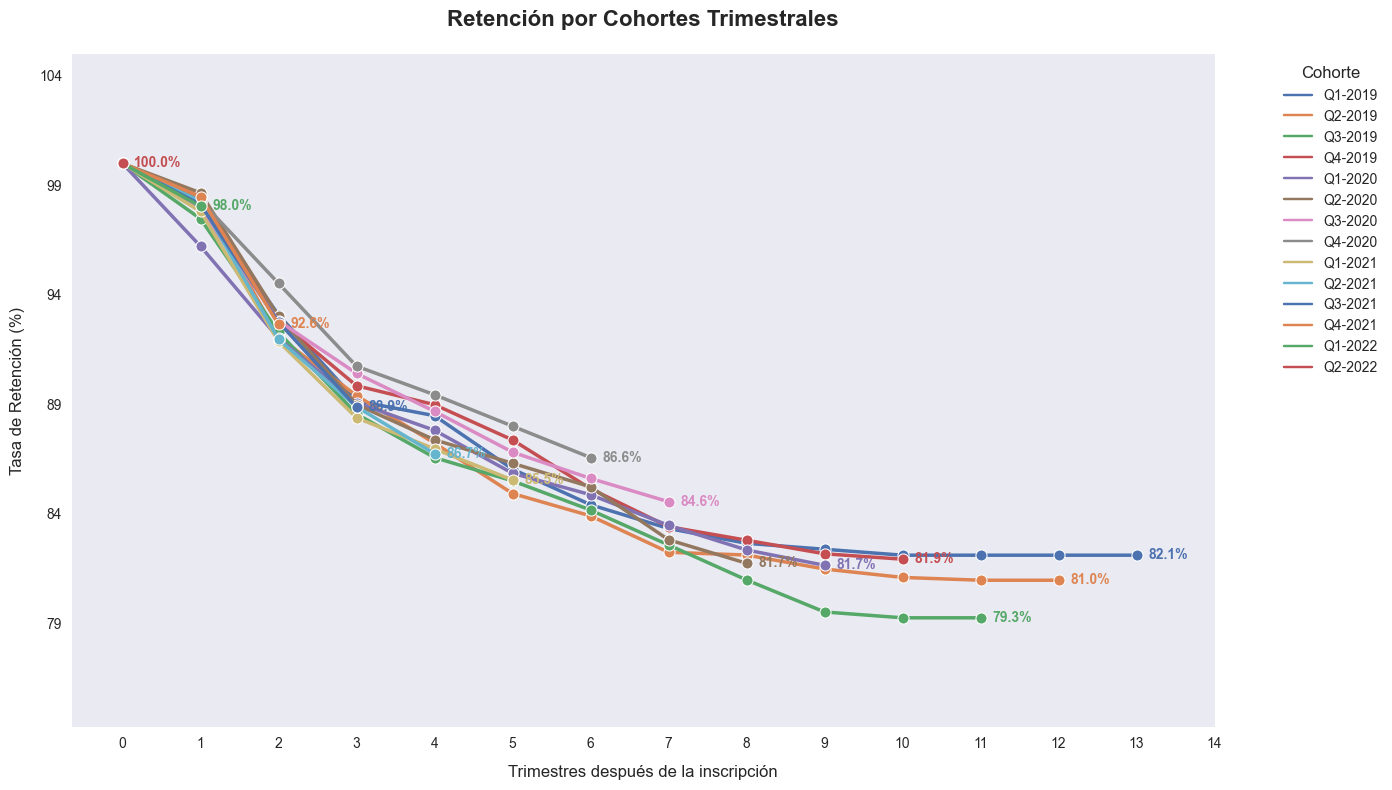

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('seaborn')
sns.set_palette('deep')

# 1. Convertir las columnas de fecha a datetime
df_ac_q['cohort_quarter'] = pd.to_datetime(df_ac_q['cohort_quarter'])
df_ac_q['quarter'] = pd.to_datetime(df_ac_q['quarter'])

# 2. Calcular la diferencia en trimestres
df_ac_q['trimestres_despues'] = ((df_ac_q['quarter'].dt.year - df_ac_q['cohort_quarter'].dt.year) * 4 +
                                (df_ac_q['quarter'].dt.quarter - df_ac_q['cohort_quarter'].dt.quarter))

# 3. Crear y formatear columna de identificación del cohorte
df_ac_q['cohort_id'] = df_ac_q['cohort_quarter'].dt.to_period('Q').astype(str)
df_ac_q['cohort_id'] = df_ac_q['cohort_id'].str.replace(r'(\d{4})Q(\d)', r'Q\2-\1', regex=True)

# 4. Ordenar los cohortes cronológicamente
cohort_order = sorted(df_ac_q['cohort_id'].unique(),
                     key=lambda x: (int(x.split('-')[1]), int(x[1])))
df_ac_q['cohort_id'] = pd.Categorical(df_ac_q['cohort_id'], categories=cohort_order, ordered=True)

# 5. Filtrar datos (mostrar hasta 12 trimestres)
max_trimestres = 14
df_plot = df_ac_q[df_ac_q['trimestres_despues'] <= max_trimestres]

# 6. Determinar límites del eje Y
y_min = df_plot['retention_rate'].min() - 5
y_max = df_plot['retention_rate'].max() + 5
y_min = max(y_min, 0)  # Asegurar que no sea negativo
y_max = min(y_max, 105)  # Asegurar que no pase de 100% + margen

# 7. Crear figura y gráfico
plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=df_plot,
                 x='trimestres_despues',
                 y='retention_rate',
                 hue='cohort_id',
                 palette='deep',  # Paleta de colores solicitada
                 linewidth=2.5,
                 marker='o',
                 markersize=8)

# 8. Añadir etiquetas con el último valor de cada cohorte
for cohort in df_plot['cohort_id'].unique():
    last_point = df_plot[df_plot['cohort_id'] == cohort].iloc[-1]
    ax.text(x=last_point['trimestres_despues'] + 0.15,  # Ligero desplazamiento
           y=last_point['retention_rate'],
           s=f"{last_point['retention_rate']:.1f}%",
           va='center',
           fontsize=10,
           fontweight='bold',  # Texto en negrita para mejor legibilidad
           color=ax.get_lines()[cohort_order.index(cohort)].get_color())

# 9. Personalización avanzada del gráfico
plt.title('Retención por Cohortes Trimestrales', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Trimestres después de la inscripción', fontsize=12, labelpad=10)
plt.ylabel('Tasa de Retención (%)', fontsize=12, labelpad=10)

# Configuración de ejes con rangos ajustados
plt.xticks(range(0, max_trimestres+1))
plt.yticks(range(int(y_min), int(y_max)+5, 5))  # Marcas cada 5%
plt.ylim(y_min, y_max)  # Rango ajustado a los datos

# Configuración de leyenda mejorada
plt.legend(title='Cohorte',
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          frameon=False,
          title_fontsize=12,
          fontsize=10)

# Eliminar elementos no deseados
plt.grid(False)
sns.despine()  # Elimina los bordes superior y derecho

# Ajustes finales
plt.tight_layout()
plt.show()

C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\2194961388.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\2194961388.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_ac_q['cohort_id'] = df_ac_q['cohort_quarter'].dt.to_period('Q').astype(str)


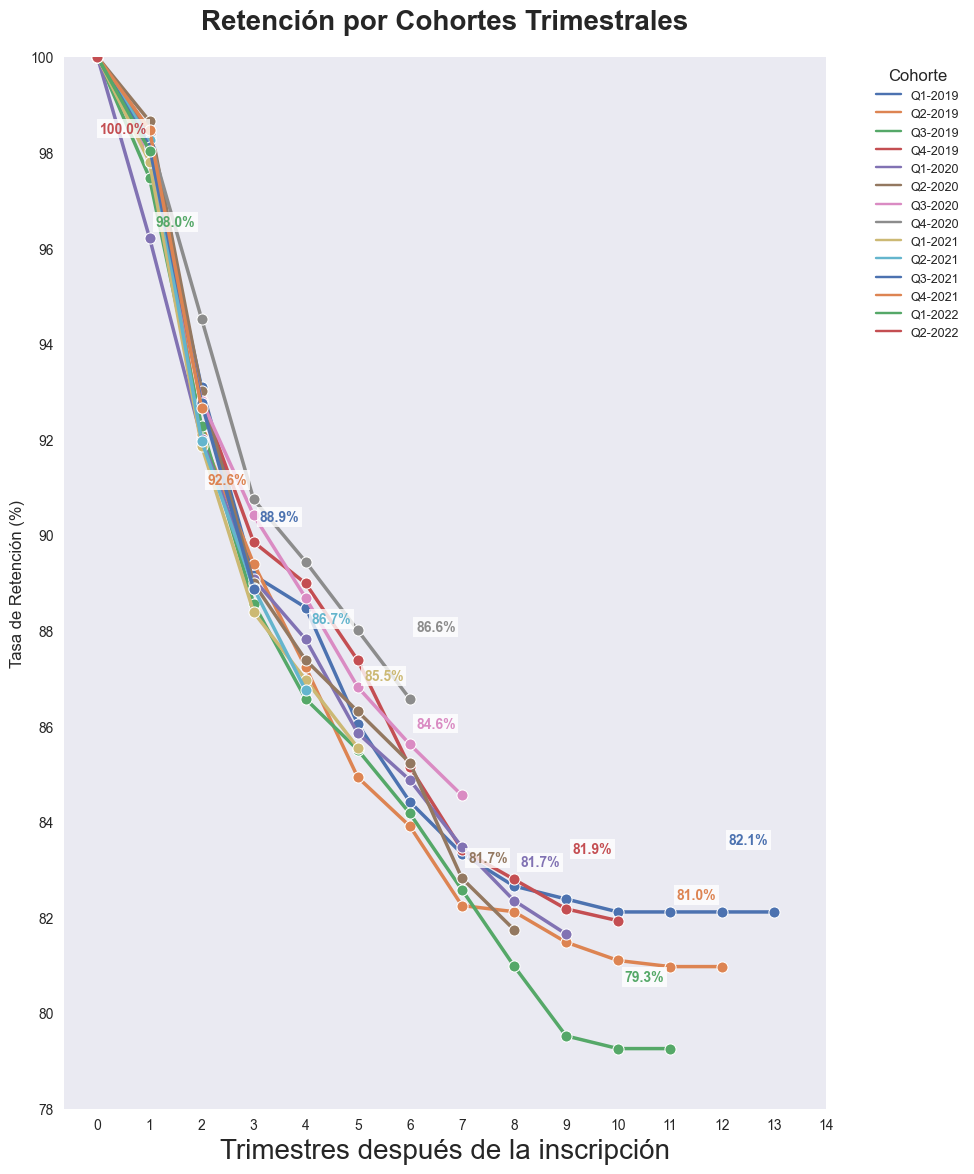

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética mejorada
plt.style.use('seaborn')
sns.set_palette('deep')
plt.rcParams['figure.figsize'] = (10, 12)  # 25% más alto que ancho (10x12)
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 15

# 1. Preparación de datos (manteniendo tu lógica original)
df_ac_q['cohort_quarter'] = pd.to_datetime(df_ac_q['cohort_quarter'])
df_ac_q['quarter'] = pd.to_datetime(df_ac_q['quarter'])
df_ac_q['trimestres_despues'] = ((df_ac_q['quarter'].dt.year - df_ac_q['cohort_quarter'].dt.year) * 4 +
                                (df_ac_q['quarter'].dt.quarter - df_ac_q['cohort_quarter'].dt.quarter))

df_ac_q['cohort_id'] = df_ac_q['cohort_quarter'].dt.to_period('Q').astype(str)
df_ac_q['cohort_id'] = df_ac_q['cohort_id'].str.replace(r'(\d{4})Q(\d)', r'Q\2-\1', regex=True)

cohort_order = sorted(df_ac_q['cohort_id'].unique(),
                     key=lambda x: (int(x.split('-')[1]), int(x[1])))
df_ac_q['cohort_id'] = pd.Categorical(df_ac_q['cohort_id'], categories=cohort_order, ordered=True)

# 2. Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 12))  # Relación 25% más alta que ancha
max_trimestres = 14
df_plot = df_ac_q[df_ac_q['trimestres_despues'] <= max_trimestres]

# 3. Gráfico principal sin flechas
lines = sns.lineplot(data=df_plot,
                    x='trimestres_despues',
                    y='retention_rate',
                    hue='cohort_id',
                    palette='deep',
                    linewidth=2.5,
                    marker='o',
                    markersize=8,
                    ax=ax)

# 4. Etiquetas de texto mejoradas
for i, cohort in enumerate(cohort_order):
    cohort_data = df_plot[df_plot['cohort_id'] == cohort]
    if len(cohort_data) == 0:
        continue
        
    color = sns.color_palette('deep')[i % len(sns.color_palette('deep'))]
    last_point = cohort_data.iloc[-1]
    x_val = last_point['trimestres_despues']
    y_val = last_point['retention_rate']
    
    # Ajustar posición del texto para evitar superposiciones
    offset_x = 0.5 if x_val < max_trimestres/2 else -0.5
    offset_y = 1.5 if y_val < 90 else -1.5
    
    ax.text(x_val + offset_x,
            y_val + offset_y,
            f"{y_val:.1f}%",
            va='center',
            ha='center',
            fontsize=10,
            fontweight='bold',
            color=color,
            bbox=dict(facecolor='white', alpha=0.8, pad=2, edgecolor='none'))

# 5. Ajustes estéticos finales
ax.set_title('Retención por Cohortes Trimestrales', fontsize=20, pad=20)
ax.set_xlabel('Trimestres después de la inscripción', fontsize=20)
ax.set_ylabel('Tasa de Retención (%)', fontsize=12)
ax.set_xticks(range(0, max_trimestres+1))
ax.set_yticks(range(78, 101, 2))  # Marcas cada 2% desde 78% a 100%
ax.set_ylim(78, 100)  # Rango específico solicitado

# Leyenda optimizada
ax.legend(title='Cohorte',
         bbox_to_anchor=(1.05, 1),
         loc='upper left',
         frameon=False,
         title_fontsize=12,
         fontsize=9)

# Estilos finales
ax.grid(False)
sns.despine()
plt.tight_layout()

# Exportar (opcional)
plt.savefig('retention_cohorts_simple.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Configuración estética
plt.style.use('seaborn')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (14, 10)

# --- Excluir cohortes con insuficientes datos ---
cohort_counts = df_ac_q['cohort_id'].value_counts()
valid_cohorts = cohort_counts[cohort_counts >= 5].index  # Mínimo 5 puntos de datos
df_filtered = df_ac_q[df_ac_q['cohort_id'].isin(valid_cohorts)]
df_filtered = df_filtered[~df_filtered['cohort_id'].isin(['Q2-2022', 'Q1-2022'])]  # Excluir específicamente estos

# --- Modelo Personalizado Basado en Q1-2019 ---
def dynamic_decay(x, a, b, c, d):
    """
    Modelo híbrido que:
    1. Combina decaimiento exponencial inicial
    2. Transición suave a estabilización
    Parámetro 'd' controla el punto de transición
    """
    return a * np.exp(-b * x) * (1 - 1/(1 + np.exp(-d * (x - 5)))) + c

# Ajustar modelo usando Q1-2019 como referencia
q1_2019_data = df_filtered[df_filtered['cohort_id'] == 'Q1-2019']
x_ref = q1_2019_data['trimestres_despues'].values
y_ref = q1_2019_data['retention_rate'].values

try:
    params_ref, _ = curve_fit(dynamic_decay, x_ref, y_ref, 
                            p0=[100, 0.2, 50, 1], 
                            bounds=([0, 0, 0, 0.1], [200, 1, 100, 3]))
except:
    params_ref = [100, 0.2, 50, 1]  # Valores por defecto si falla el ajuste

# --- Proyección para todos los cohortes ---
cohort_projections = {}
for cohort in df_filtered['cohort_id'].unique():
    cohort_data = df_filtered[df_filtered['cohort_id'] == cohort].sort_values('trimestres_despues')
    x = cohort_data['trimestres_despues'].values
    y = cohort_data['retention_rate'].values
    
    try:
        # Usar parámetros de Q1-2019 como prior
        params, _ = curve_fit(dynamic_decay, x, y, 
                             p0=params_ref,
                             bounds=([0, 0, 0, 0.1], [200, 1, 100, 3]))
        
        # Proyección hasta T13
        x_proj = np.arange(0, 14)
        y_proj = dynamic_decay(x_proj, *params)
        
        # Calcular trimestre de estabilización (derivada < 0.5%/trimestre)
        diffs = np.abs(np.diff(y_proj))
        stable_q = np.argmax(diffs < 0.5) if any(diffs < 0.5) else 12
        
        cohort_projections[cohort] = {
            'proyeccion': y_proj,
            'retencion_T13': y_proj[13],
            'estabilizacion': stable_q
        }
    except Exception as e:
        print(f"Error modelando {cohort}: {str(e)}")
        continue

C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\2067194684.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


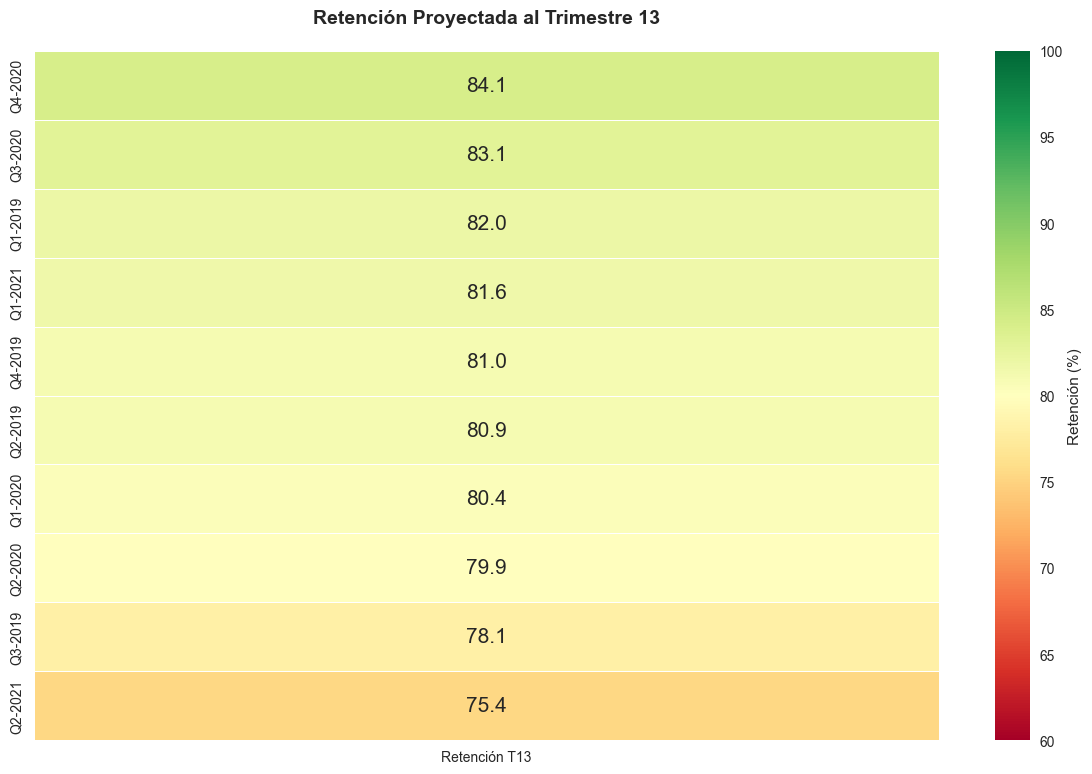

In [ ]:
# Preparar datos para el heatmap
heatmap_data = []
for cohort, data in cohort_projections.items():
    heatmap_data.append({
        'Cohorte': cohort,
        'Retención T13': data['retencion_T13'],
        'Estabilización': data['estabilizacion']
    })

heatmap_df = pd.DataFrame(heatmap_data).sort_values('Retención T13', ascending=False)

# Visualización mejorada
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_df.set_index('Cohorte')[['Retención T13']],
    annot=True, 
    fmt=".1f", 
    cmap='RdYlGn',  # Paleta rojo-verde para mejor contraste
    center=80,       # Centro en 80%
    vmin=60,         # Mínimo del rango de color
    vmax=100,        # Máximo del rango
    linewidths=0.5,
    cbar_kws={'label': 'Retención (%)'}
)

plt.title('Retención Proyectada al Trimestre 13', fontsize=14, pad=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

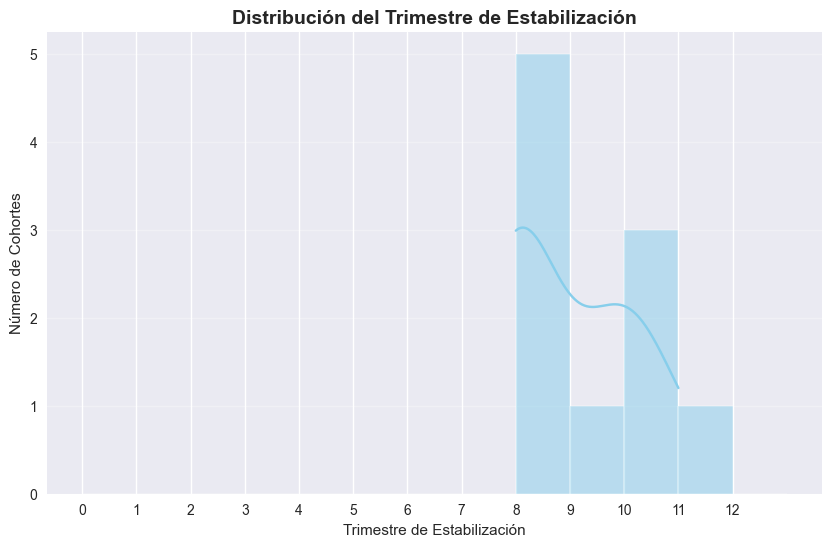

In [48]:
# Gráfico de distribución de estabilización
plt.figure(figsize=(10, 6))
sns.histplot(
    data=heatmap_df,
    x='Estabilización',
    bins=range(0, 14),
    kde=True,
    color='skyblue',
    edgecolor='white'
)

plt.title('Distribución del Trimestre de Estabilización', fontsize=14)
plt.xlabel('Trimestre de Estabilización')
plt.ylabel('Número de Cohortes')
plt.xticks(range(0, 13))
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.show()

In [49]:
# Generar reporte completo
report_df = heatmap_df.copy()
report_df['Estabilidad'] = report_df['Estabilización'].apply(
    lambda x: f"T-{x} ({'Temprana' if x < 6 else 'Tardía'})"
)

# Análisis comparativo
q1_2019_T13 = cohort_projections.get('Q1-2019', {}).get('retencion_T13', np.nan)
avg_T13 = report_df['Retención T13'].mean()
better_than_q1 = len(report_df[report_df['Retención T13'] > q1_2019_T13])

print("📊 INFORME COMPARATIVO DE RETENCIÓN")
print("----------------------------------")
print(f"Cohortes analizados: {len(report_df)}")
print(f"Retención promedio en T13: {avg_T13:.1f}%")
print(f"\n🔍 Referencia Q1-2019: {q1_2019_T13:.1f}%")
print(f"- {better_than_q1} cohortes superan a Q1-2019")
print(f"- {len(report_df) - better_than_q1} cohortes están por debajo")

print("\n🏆 Top 3 Cohortes:")
display(report_df.head(3).style.background_gradient(subset=['Retención T13'], cmap='RdYlGn'))

print("\n📉 Bottom 3 Cohortes:")
display(report_df.tail(3).style.background_gradient(subset=['Retención T13'], cmap='RdYlGn_r'))

print("\n📌 Distribución de Estabilización:")
display(report_df['Estabilidad'].value_counts().to_frame('Conteo'))

📊 INFORME COMPARATIVO DE RETENCIÓN
----------------------------------
Cohortes analizados: 10
Retención promedio en T13: 80.7%

🔍 Referencia Q1-2019: 82.0%
- 2 cohortes superan a Q1-2019
- 8 cohortes están por debajo

🏆 Top 3 Cohortes:


,Cohorte,Retención T13,Estabilización,Estabilidad
7,Q4-2020,84.078528,8,T-8 (Tardía)
6,Q3-2020,83.112367,8,T-8 (Tardía)
0,Q1-2019,82.015056,8,T-8 (Tardía)



📉 Bottom 3 Cohortes:


,Cohorte,Retención T13,Estabilización,Estabilidad
5,Q2-2020,79.907627,10,T-10 (Tardía)
2,Q3-2019,78.098286,11,T-11 (Tardía)
9,Q2-2021,75.369456,10,T-10 (Tardía)



📌 Distribución de Estabilización:


,Conteo
T-8 (Tardía),5
T-10 (Tardía),3
T-9 (Tardía),1
T-11 (Tardía),1


C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\209215658.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


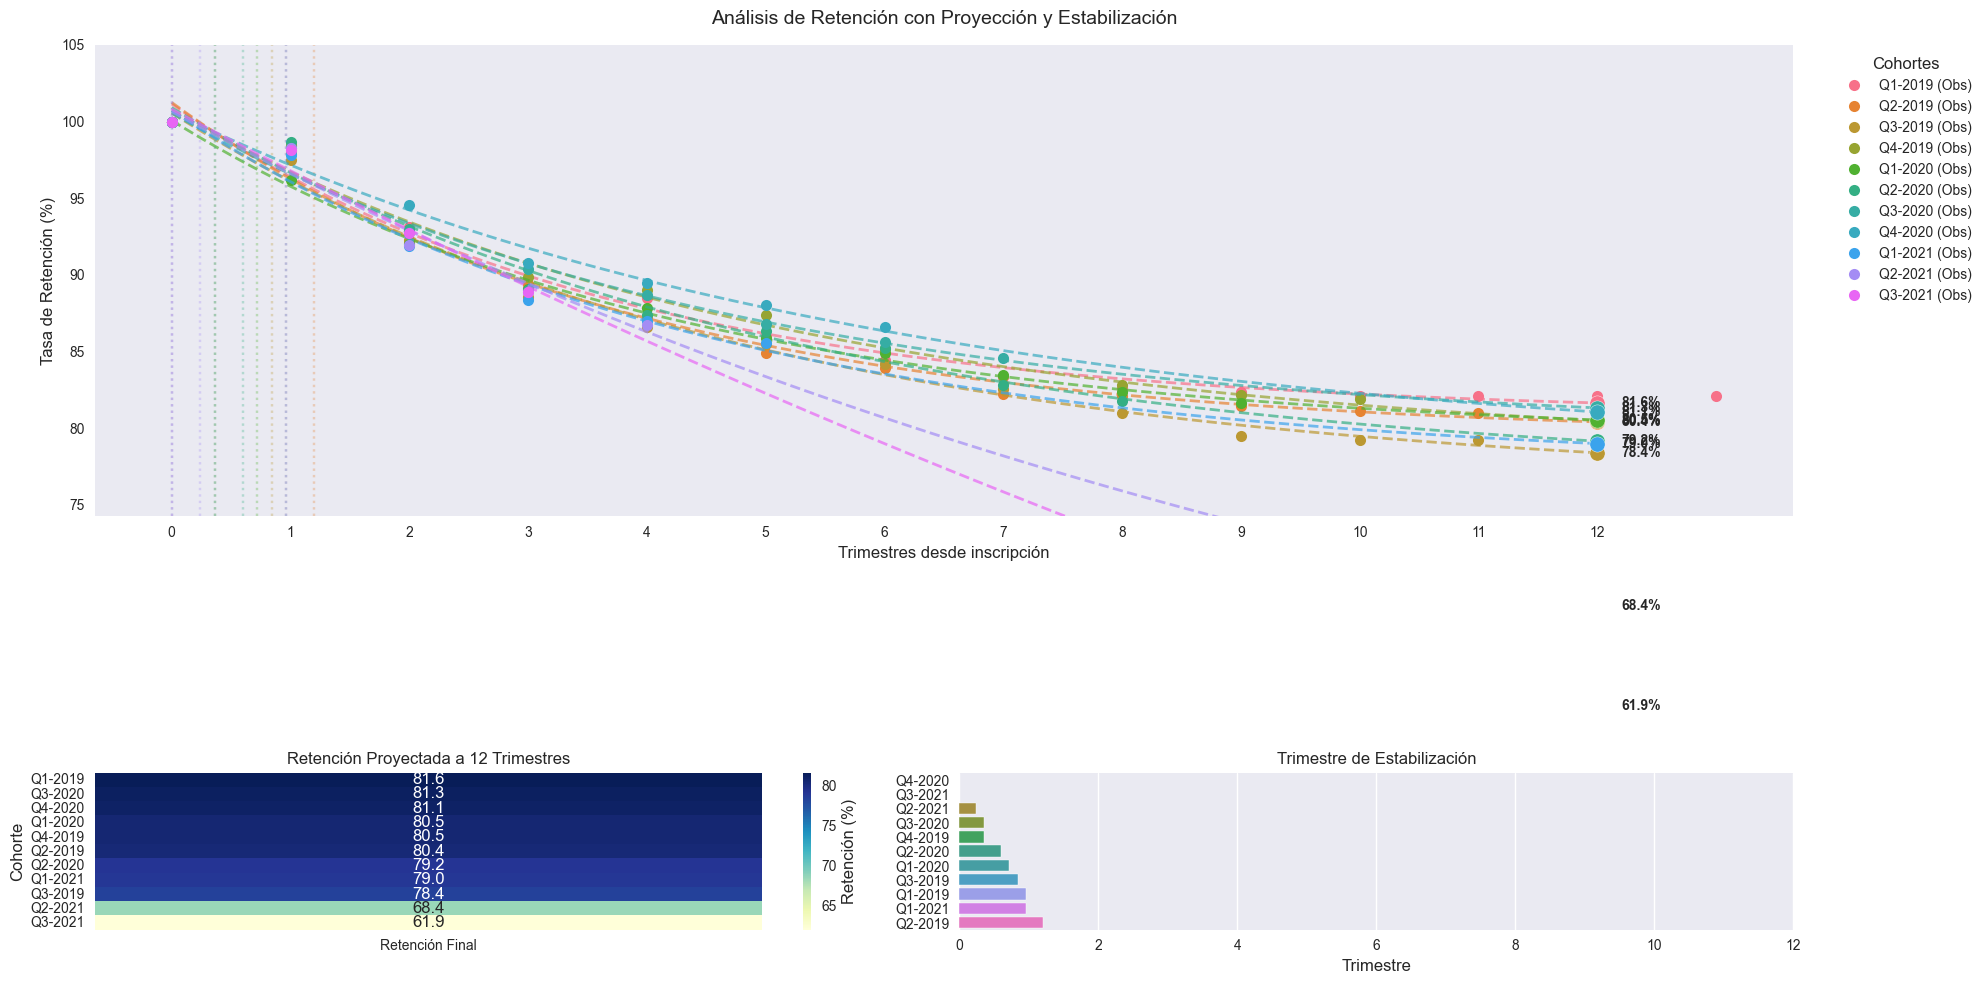

📊 REPORTE DE RETENCIÓN POR COHORTES
-----------------------------------

🔍 Estadísticas Clave:
- Retención promedio a 12 trimestres: 77.5%
- Estabilización promedio en trimestre: 0.6
- Variabilidad en retención final: 6.3%

🏆 Top 3 Cohortes:
1. Q1-2019: 81.6% (estabiliza en T-1.0)
2. Q3-2020: 81.3% (estabiliza en T-0.4)
3. Q4-2020: 81.1% (estabiliza en T-0.0)

📈 Tendencias Temporales:
- Retención empeorando (81.3% → 69.6%) en cohortes recientes


,Retención Final,Trimestre Estabilización,Tasa Decaimiento,Retención Base
Q1-2019,81.648839,0.96,0.267441,8.082836e+01
Q3-2020,81.325551,0.36,0.211201,7.966999e+01
Q4-2020,81.058778,0.00,0.165717,7.795608e+01
Q1-2020,80.540228,0.72,0.231071,7.923870e+01
Q4-2019,80.496143,0.36,0.196986,7.839682e+01
Q2-2019,80.409531,1.20,0.259118,7.943648e+01
Q2-2020,79.155972,0.60,0.193497,7.679089e+01
Q1-2021,78.998086,0.96,0.221723,7.736566e+01
Q3-2019,78.397786,0.84,0.201486,7.623030e+01
Q2-2021,68.427829,0.24,0.081456,4.899258e+01


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Configuración estética profesional
plt.style.use('seaborn')
sns.set_palette('husl', n_colors=12)
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

## ----------------------------------------------------------
## MODELO CON RESTRICCIONES DE NEGOCIO
## ----------------------------------------------------------

def constrained_model(x, a, b, c):
    """
    Modelo con restricciones:
    1. Siempre decreciente (no puede aumentar la retención)
    2. Se estabiliza después de cierto punto
    3. Nunca cae por debajo del mínimo razonable
    """
    return np.maximum(a * np.exp(-b * x) + c, c)

def monotonic_fit(cohort_data, max_trimestres=12):
    """Ajuste que garantiza monotonía decreciente"""
    x = cohort_data['trimestres_despues'].values
    y = cohort_data['retention_rate'].values
    
    try:
        # Estimación inicial inteligente
        p0 = [y[0] - y[-1], 0.2, y[-1]]
        
        # Ajuste con restricciones
        params, _ = curve_fit(constrained_model, x, y, p0=p0, 
                            bounds=([0, 0, 0], 
                                   [200, 2, 100]),
                            maxfev=10000)
        
        # Proyección garantizando monotonía
        x_fit = np.linspace(0, max_trimestres, 100)
        y_fit = constrained_model(x_fit, *params)
        
        # Calcular trimestre de estabilización (cuando cambia menos de 0.5% por trimestre)
        diffs = np.abs(np.diff(y_fit))
        stable_idx = np.where(diffs < 0.5)[0]
        stable_quarter = stable_idx[0]/len(x_fit)*max_trimestres if len(stable_idx) > 0 else max_trimestres
        
        return x_fit, y_fit, params, stable_quarter
    
    except Exception as e:
        print(f"Error ajustando {cohort}: {str(e)}")
        return None, None, None, None

## ----------------------------------------------------------
## VISUALIZACIÓN PROFESIONAL CON AJUSTES
## ----------------------------------------------------------

# Preparar figura con 2 subplots
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Diccionario para métricas
cohort_metrics = {}

# Gráfico principal: Curvas de retención
for i, cohort in enumerate(sorted_cohorts):
    cohort_data = df_filtered[df_filtered['cohort_id'] == cohort].sort_values('trimestres_despues')
    
    # Ajustar modelo con restricciones
    x_fit, y_fit, params, stable_quarter = monotonic_fit(cohort_data)
    if x_fit is None:
        continue
    
    # Almacenar métricas
    final_rate = y_fit[-1]
    cohort_metrics[cohort] = {
        'Retención Final': final_rate,
        'Trimestre Estabilización': stable_quarter,
        'Tasa Decaimiento': params[1],
        'Retención Base': params[2]
    }
    
    # Graficar con estilo profesional
    color = sns.color_palette()[i % 12]
    
    # Datos observados
    ax1.plot(cohort_data['trimestres_despues'], cohort_data['retention_rate'], 
             'o', color=color, markersize=8, 
             label=f'{cohort} (Obs)')
    
    # Proyección modelo
    ax1.plot(x_fit, y_fit, '--', color=color, linewidth=2, alpha=0.7)
    
    # Marcar estabilización
    ax1.axvline(x=stable_quarter, color=color, linestyle=':', alpha=0.3)
    
    # Etiqueta final
    ax1.scatter(x_fit[-1], y_fit[-1], color=color, s=120, 
               edgecolor='white', zorder=5)
    ax1.text(x_fit[-1]+0.2, y_fit[-1], f'{y_fit[-1]:.1f}%', 
            va='center', fontsize=10, fontweight='bold')

# Ajustar eje Y para mejor visualización
y_min = max(0, df_filtered['retention_rate'].min() - 5)
y_max = min(105, df_filtered['retention_rate'].max() + 5)
ax1.set_ylim(y_min, y_max)

# Personalización gráfico principal
ax1.set_title('Análisis de Retención con Proyección y Estabilización', fontsize=14, pad=15)
ax1.set_xlabel('Trimestres desde inscripción', fontsize=12)
ax1.set_ylabel('Tasa de Retención (%)', fontsize=12)
ax1.set_xticks(range(0, 13))
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Cohortes')
ax1.grid(False)
sns.despine(ax=ax1)

# Gráfico 2: Heatmap de retención final
metrics_df = pd.DataFrame(cohort_metrics).T.sort_values('Retención Final', ascending=False)
sns.heatmap(metrics_df[['Retención Final']].astype(float),
           annot=True, fmt=".1f", cmap='YlGnBu', ax=ax2,
           cbar_kws={'label': 'Retención (%)'})
ax2.set_title('Retención Proyectada a 12 Trimestres', fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('Cohorte')
ax2.tick_params(axis='y', rotation=0)

# Gráfico 3: Trimestres de estabilización
stabilization_df = metrics_df[['Trimestre Estabilización']].sort_values('Trimestre Estabilización')
sns.barplot(data=stabilization_df.reset_index(), 
           y='index', x='Trimestre Estabilización',
           palette='husl', ax=ax3)
ax3.set_title('Trimestre de Estabilización', fontsize=12)
ax3.set_xlabel('Trimestre')
ax3.set_ylabel('')
ax3.set_xlim(0, 12)

# Ajustes finales
plt.tight_layout()
plt.show()

## ----------------------------------------------------------
## REPORTE AUTOMATIZADO
## ----------------------------------------------------------

print("📊 REPORTE DE RETENCIÓN POR COHORTES")
print("-----------------------------------")

# Estadísticas clave
print(f"\n🔍 Estadísticas Clave:")
print(f"- Retención promedio a 12 trimestres: {metrics_df['Retención Final'].mean():.1f}%")
print(f"- Estabilización promedio en trimestre: {metrics_df['Trimestre Estabilización'].mean():.1f}")
print(f"- Variabilidad en retención final: {metrics_df['Retención Final'].std():.1f}%")

# Top performers
print("\n🏆 Top 3 Cohortes:")
top3 = metrics_df.sort_values('Retención Final', ascending=False).head(3)
for i, (cohort, data) in enumerate(top3.iterrows(), 1):
    print(f"{i}. {cohort}: {data['Retención Final']:.1f}% (estabiliza en T-{data['Trimestre Estabilización']:.1f})")

# Análisis de tendencia temporal
print("\n📈 Tendencias Temporales:")
if len(metrics_df) > 4:
    early = metrics_df.iloc[:3]['Retención Final'].mean()
    late = metrics_df.iloc[-3:]['Retención Final'].mean()
    trend = "mejorando" if late > early else "empeorando"
    print(f"- Retención {trend} ({early:.1f}% → {late:.1f}%) en cohortes recientes")

display(metrics_df.sort_values('Retención Final', ascending=False))

## 4 ML

In [94]:
df = read_csv_fun('Aleg','all', dir)
print(df.head(5))

   idcompany country  channel        profile  idcompany-2 registrationdate  \
0      92996     COL  Digital     Empresario        92996       2019-08-14   
1      26541     COL  Digital     Empresario        26541       2021-11-15   
2      80285     COL  Digital  Independiente        80285       2021-08-30   
3      26274     COL  Digital  Independiente        26274       2021-11-19   
4      43175     COL  Digital     Empresario        43175       2020-11-21   

  planname  paymentfrequency lastpaidplan firstpaymentdate retirementdate  \
0     plus                 1          NaN       2019-08-15            NaN   
1     pyme                 1          NaN       2021-11-16            NaN   
2      pro                 1          NaN       2021-09-18            NaN   
3     pyme                 1          NaN       2021-12-28            NaN   
4     pyme                 1          NaN       2020-11-24            NaN   

   avgmoninvoices  avgmonbilling  users  downloadreports  helpreques

In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idcompany         10000 non-null  int64 
 1   country           10000 non-null  object
 2   channel           10000 non-null  object
 3   profile           10000 non-null  object
 4   idcompany-2       10000 non-null  int64 
 5   registrationdate  10000 non-null  object
 6   planname          10000 non-null  object
 7   paymentfrequency  10000 non-null  int64 
 8   lastpaidplan      1888 non-null   object
 9   firstpaymentdate  9396 non-null   object
 10  retirementdate    1888 non-null   object
 11  avgmoninvoices    10000 non-null  int64 
 12  avgmonbilling     10000 non-null  int64 
 13  users             10000 non-null  int64 
 14  downloadreports   10000 non-null  int64 
 15  helprequests      10000 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.2+ MB
None


In [114]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Configuración de visualización
plt.style.use('seaborn')
sns.set_palette("deep")

## 1. Preparación de datos corregida
# Precios de planes actualizados y filtro para excluir 'consulta'
plan_prices = {'pyme': 20, 'pro': 40, 'plus': 80}  # Precios actualizados según tu corrección
df = df[df['planname'] != 'consulta']  # Excluir planes de consulta

# Calcular MRR por empresa
df['mrr'] = df['planname'].map(plan_prices) / df['paymentfrequency']

# Filtrar solo clientes activos (sin retirementdate) y con firstpaymentdate válida
df_active = df[df['retirementdate'].isna() & df['firstpaymentdate'].notna()].copy()

# Convertir a datetime y extraer mes
df_active['firstpaymentdate'] = pd.to_datetime(df_active['firstpaymentdate'])
df_active['payment_month'] = df_active['firstpaymentdate'].dt.to_period('M')

C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\2805881067.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [115]:
## 2. Modelo de crecimiento (Regresión Lineal) corregido
# Agrupar MRR histórico por mes
mrr_history = df_active.groupby('payment_month')['mrr'].sum().reset_index()
mrr_history['months'] = (mrr_history['payment_month'] - mrr_history['payment_month'].min()).apply(lambda x: x.n)

# Entrenar modelo
model = LinearRegression()
model.fit(mrr_history[['months']], mrr_history['mrr'])
future_months = np.array(range(mrr_history['months'].max()+1, mrr_history['months'].max()+13)).reshape(-1,1)
projected_mrr = model.predict(future_months)

# Calcular brecha para 20% de crecimiento
current_mrr = df_active['mrr'].sum()
target_mrr = current_mrr * 1.20
gap = target_mrr - projected_mrr[-1]  # Diferencia vs proyección lineal

print(current_mrr)
print(target_mrr)
print(gap)
print(projected_mrr)

63275.0
75930.0
75074.21184088806
[1021.50724638 1006.44187481  991.37650324  976.31113167  961.2457601
  946.18038853  931.11501696  916.04964539  900.98427382  885.91890225
  870.85353068  855.78815911]


C:\Users\mcaba\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [126]:
min_growth = 0.02  # 2% mensual (basado en histórico temprano)
last_real_mrr = mrr_history[mrr_history['mrr'] > 1000]['mrr'].iloc[-1]
adjusted_projection = [last_real_mrr * (1+min_growth)**i for i in range(1,13)]

In [176]:
## 3. Estrategia para cerrar la brecha (versión mejorada)
# A. Upselling a clientes existentes (con criterios más robustos)
def calculate_upsell_potential(df, upgrade_paths):
    potential = 0
    for current_plan, target_plan in upgrade_paths:
        subset = df[df['planname'] == current_plan]
        # Criterios mejorados: facturación alta Y actividad reciente
        targets = subset[
            (subset['avgmonbilling'] > subset['avgmonbilling'].quantile(0.25)) &
            (subset['users'] > 3)  # Nuevo criterio clave
        ]
        potential += len(targets) * (plan_prices[target_plan] - plan_prices[current_plan])
    return potential

upgrade_paths = [('pyme', 'pro'), ('pro', 'plus')]
upsell_potential = calculate_upsell_potential(df_active, upgrade_paths)

In [158]:
# B. Reducción de churn (basado en cohortes)
retention_rate = 0.841  # De análisis de cohortes previo
churn_reduction_target = 0.05  # 5% de mejora
current_churn_value = current_mrr * (1-retention_rate)
churn_savings = current_churn_value * churn_reduction_target

In [159]:
# Calcular crecimiento mensual real por país
df['payment_month'] = pd.to_datetime(df['firstpaymentdate']).dt.to_period('M')
country_growth = df.groupby(['country', 'payment_month'])['mrr'].sum().unstack(0).pct_change().mean()

print("Crecimiento mensual promedio por país:")
print(country_growth)

Crecimiento mensual promedio por país:
country
COL    0.005396
MEX    0.295120
PAN    0.157464
PER    0.187331
dtype: float64


In [168]:
# C. Adquisición en mercados clave (enfoque COL + PAN)
def acquisition_target(country_focus, avg_mrr_per_new_client=43, months=12):
    focus_clients = df[df['country'].isin(country_focus)]
    # Tasas basadas en análisis previo de crecimiento por país
    growth_rates = {'COL': 0.0053966, 'PAN': 0.157464}  
    new_clients = sum(
        len(focus_clients[focus_clients['country'] == c]) * rate * months 
        for c, rate in growth_rates.items()
    )
    return new_clients * avg_mrr_per_new_client

acquisition_gain = acquisition_target(['COL', 'PAN'])

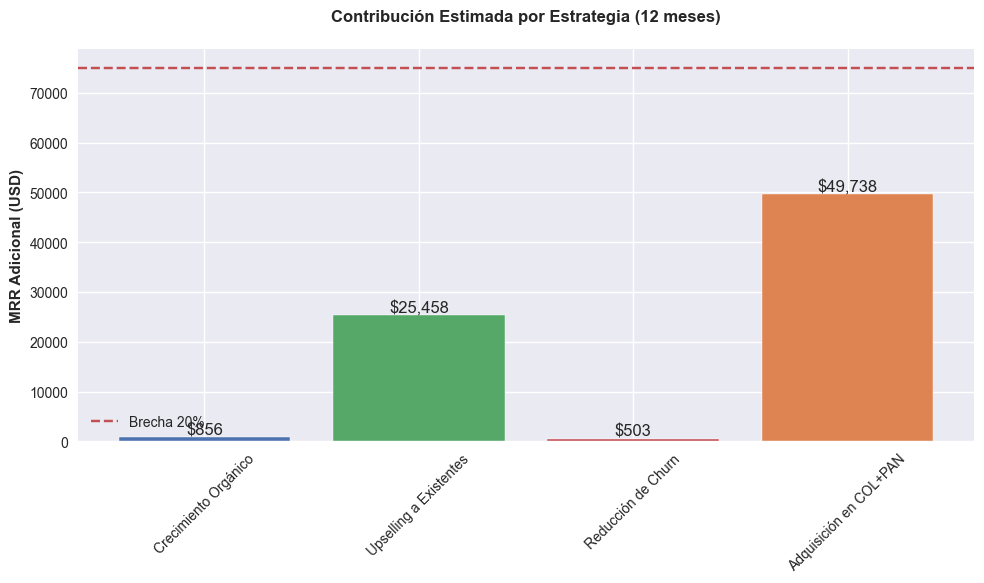

In [177]:
## 4. Visualización del Plan (mejorada)
strategies = {
    'Crecimiento Orgánico': projected_mrr[-1],
    'Upselling a Existentes': upsell_potential * 0.3,  # 30% tasa de conversión
    'Reducción de Churn': churn_savings,
    'Adquisición en COL+PAN': acquisition_gain
}

plt.figure(figsize=(10,6))
bars = plt.bar(strategies.keys(), strategies.values(), color=['#4C72B0','#55A868','#C44E52','#DD8452'])
plt.axhline(y=gap, color='r', linestyle='--', label='Brecha 20%')
plt.title('Contribución Estimada por Estrategia (12 meses)', pad=20, fontweight='bold')
plt.ylabel('MRR Adicional (USD)', fontweight='bold')
plt.xticks(rotation=45)
plt.legend()

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

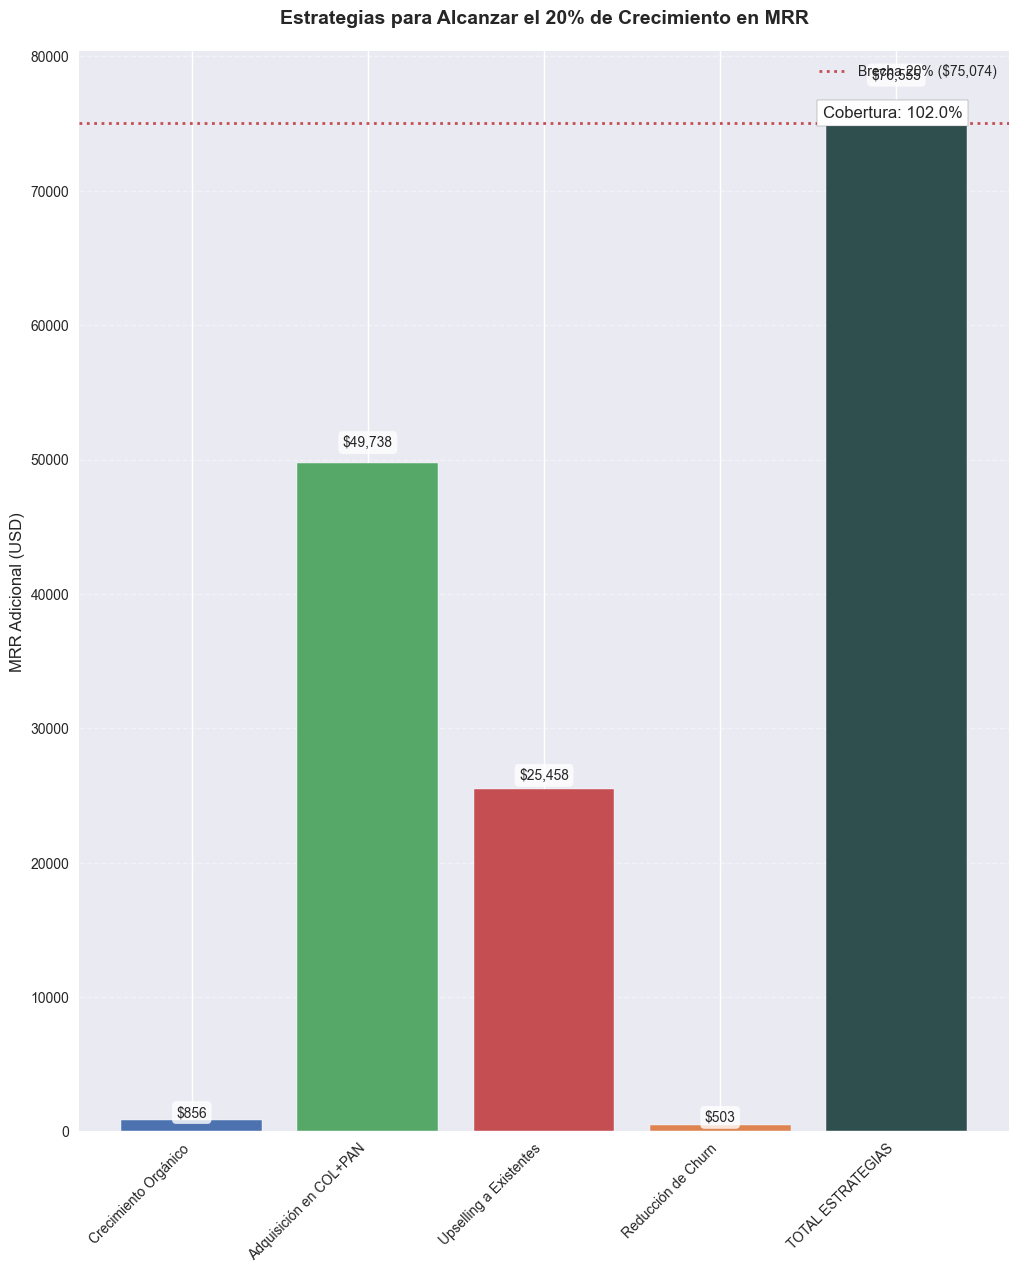

In [180]:
## 4. Visualización del Plan (mejorada)

# Configuración mejorada para evitar el error
plt.figure(figsize=(12, 18))  # Aumentar el tamaño de la figura

# Ordenar estrategias para mejor visualización
sorted_strategies = {
    'Crecimiento Orgánico': strategies['Crecimiento Orgánico'],
    'Adquisición en COL+PAN': strategies['Adquisición en COL+PAN'],
    'Upselling a Existentes': strategies['Upselling a Existentes'],
    'Reducción de Churn': strategies['Reducción de Churn'],
    'TOTAL ESTRATEGIAS': sum(strategies.values())
}

# Crear gráfico con parámetros ajustados
bars = plt.bar(sorted_strategies.keys(), sorted_strategies.values(), 
               color=['#4C72B0','#55A868','#C44E52','#DD8452','#2F4F4F'])

# Personalización
plt.axhline(y=gap, color='r', linestyle=':', linewidth=2, label=f'Brecha 20% (${gap:,.0f})')
plt.title('Estrategias para Alcanzar el 20% de Crecimiento en MRR', 
          pad=20, fontsize=14, fontweight='bold')
plt.ylabel('MRR Adicional (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Añadir valores con formato
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height*1.02,
             f'${height:,.0f}',
             ha='center', va='bottom',
             fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Ajustes finales
plt.subplots_adjust(bottom=0.25, top=0.85)  # Ajustar márgenes manualmente
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(loc='upper right', framealpha=1)

# Mostrar porcentaje de cobertura
coverage = sorted_strategies['TOTAL ESTRATEGIAS']/gap*100
plt.text(0.95, 0.95, 
         f"Cobertura: {coverage:.1f}%", 
         transform=plt.gca().transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', edgecolor='gray'))

plt.show()

C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\323767578.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



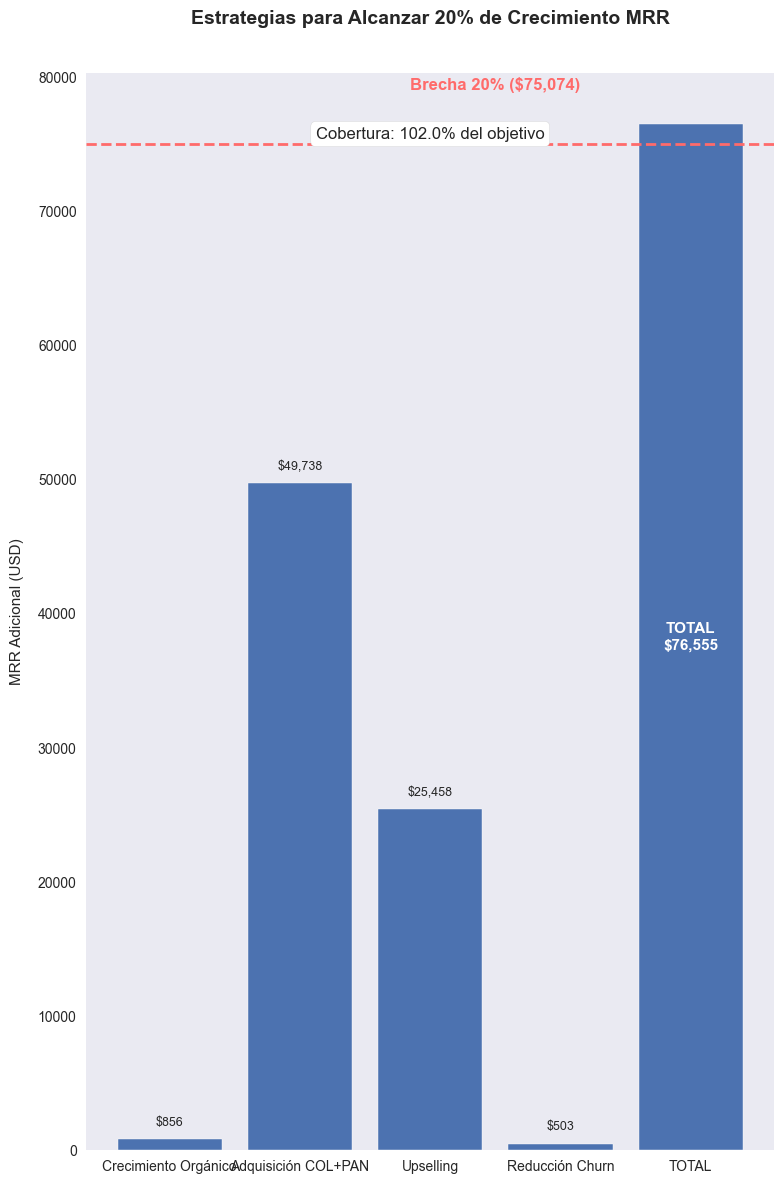

In [183]:
# Configuración de estilo
plt.style.use('seaborn')
sns.set_palette("deep")
plt.figure(figsize=(8, 12))

# Datos ordenados
sorted_strategies = {
    'Crecimiento Orgánico': strategies['Crecimiento Orgánico'],
    'Adquisición COL+PAN': strategies['Adquisición en COL+PAN'],
    'Upselling': strategies['Upselling a Existentes'],
    'Reducción Churn': strategies['Reducción de Churn'],
    'TOTAL': sum(strategies.values())
}

# Crear gráfico
bars = plt.bar(sorted_strategies.keys(), sorted_strategies.values())

# Personalización avanzada
plt.title('Estrategias para Alcanzar 20% de Crecimiento MRR\n', 
          fontsize=14, fontweight='bold', pad=20)

# Eliminar grid y bordes
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Texto dentro de la barra TOTAL (ajuste automático de posición)
total_height = sorted_strategies['TOTAL']
plt.text(list(sorted_strategies.keys()).index('TOTAL'), total_height/2,
         f"TOTAL\n${total_height:,.0f}",
         ha='center', va='center',
         color='white',
         fontweight='bold',
         fontsize=11)

# Texto de cobertura en parte superior
coverage = sorted_strategies['TOTAL']/gap*100
plt.text(0.5, 0.95, 
         f"Cobertura: {coverage:.1f}% del objetivo", 
         transform=plt.gca().transAxes,
         ha='center', va='top',
         fontsize=12,
         bbox=dict(facecolor='white', edgecolor='lightgray', boxstyle='round'))

# Línea de brecha centrada
plt.axhline(y=gap, color='#FF6B6B', linestyle='--', linewidth=2)
plt.text(len(sorted_strategies)/2, gap*1.05, 
         f'Brecha 20% (${gap:,.0f})',
         ha='center', va='bottom',
         color='#FF6B6B',
         fontweight='bold')

# Etiquetas de valores para barras individuales (excepto TOTAL)
for i, (name, value) in enumerate(sorted_strategies.items()):
    if name != 'TOTAL':
        plt.text(i, value + max(sorted_strategies.values())*0.01,
                 f'${value:,.0f}',
                 ha='center', va='bottom',
                 fontsize=9)

# Ajustes finales
plt.ylabel('MRR Adicional (USD)', labelpad=10)
plt.xticks(rotation=0)  # Horizontal para mejor lectura
plt.tight_layout()
plt.show()

C:\Users\mcaba\AppData\Local\Temp\ipykernel_20080\3677790430.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



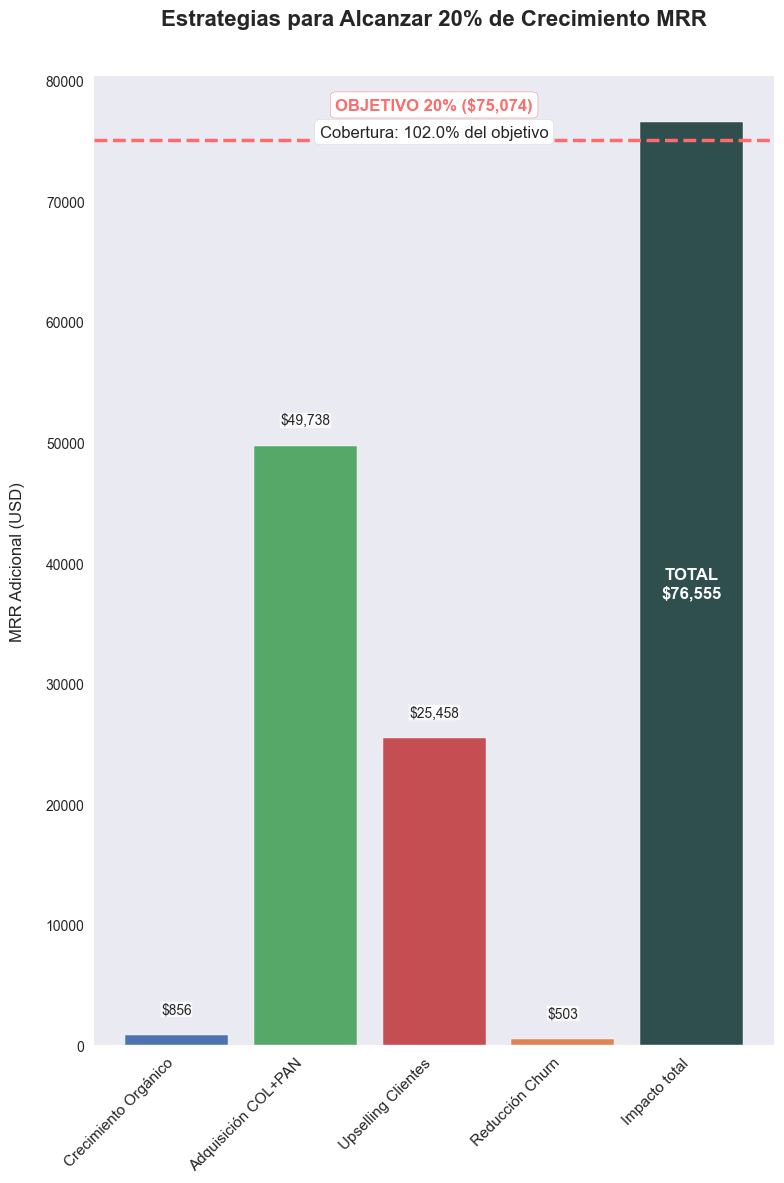

In [189]:
# Configuración de estilo
plt.style.use('seaborn')
sns.set_palette("deep")
plt.figure(figsize=(8, 12))

# Datos y colores personalizados
strategies_data = {
    'Crecimiento Orgánico': strategies['Crecimiento Orgánico'],
    'Adquisición COL+PAN': strategies['Adquisición en COL+PAN'],
    'Upselling Clientes': strategies['Upselling a Existentes'],
    'Reducción Churn': strategies['Reducción de Churn'],
    'Impacto total': sum(strategies.values())
}

colors = ['#4C72B0', '#55A868', '#C44E52', '#DD8452', '#2F4F4F']  # Paleta deep + extra

# Crear gráfico
bars = plt.bar(strategies_data.keys(), strategies_data.values(), color=colors)

# Personalización avanzada
plt.title('Estrategias para Alcanzar 20% de Crecimiento MRR\n', 
          fontsize=16, fontweight='bold', pad=20)

# Configuración de ejes
plt.ylabel('MRR Adicional (USD)', fontsize=12, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=10)

# Eliminar grid y bordes
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Texto dentro de la barra TOTAL
total_height = strategies_data['Impacto total']
plt.text(len(strategies_data)-1, total_height*0.5,
         f"TOTAL\n${total_height:,.0f}",
         ha='center', va='center',
         color='white',
         fontweight='bold',
         fontsize=12)

# Línea de brecha y etiqueta
plt.axhline(y=gap, color='#FF6B6B', linestyle='--', linewidth=2.5)
plt.text(len(strategies_data)/2-0.5, gap*1.03, 
         f'OBJETIVO 20% (${gap:,.0f})',
         ha='center', va='bottom',
         color='#FF6B6B',
         fontweight='bold',
         fontsize=12,
         bbox=dict(facecolor='white', edgecolor='#FF6B6B', boxstyle='round,pad=0.3'))

# Indicador de cobertura
coverage = strategies_data['Impacto total']/gap*100
plt.text(0.5, 0.95, 
         f"Cobertura: {coverage:.1f}% del objetivo", 
         transform=plt.gca().transAxes,
         ha='center', va='top',
         fontsize=12,
         bbox=dict(facecolor='white', edgecolor='lightgray', boxstyle='round'))

# Valores para cada barra
for i, (name, value) in enumerate(strategies_data.items()):
    if name != 'Impacto total':
        plt.text(i, value + max(strategies_data.values())*0.02,
                 f'${value:,.0f}',
                 ha='center', va='bottom',
                 fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.8, pad=0.3))

# Ajuste de márgenes
plt.subplots_adjust(bottom=0.25, top=0.85)
plt.tight_layout()
plt.show()

In [192]:
## 5. Resultado Final y Recomendaciones
# Cálculos de contribución porcentual
total_estrategias = sum(strategies.values())
contribuciones = {k: (v/total_estrategias)*100 for k, v in strategies.items()}

print(f"""
💵 MRR Actual: ${current_mrr:,.0f}
🎯 Objetivo (+20%): ${target_mrr:,.0f}
📈 Proyección con estrategias: ${current_mrr + total_estrategias:,.0f}

🔍 Contribución por Palanca:
1. Crecimiento Orgánico: ${strategies['Crecimiento Orgánico']:,.0f} ({contribuciones['Crecimiento Orgánico']:.1f}%)
2. Upselling: ${strategies['Upselling a Existentes']:,.0f} ({contribuciones['Upselling a Existentes']:.1f}%)
3. Reducción Churn: ${strategies['Reducción de Churn']:,.0f} ({contribuciones['Reducción de Churn']:.1f}%)
4. Adquisición: ${strategies['Adquisición en COL+PAN']:,.0f} ({contribuciones['Adquisición en COL+PAN']:.1f}%)

🔑 Acciones Clave:
- 🚀 Upsell a 25% empresas (30% de conversión esperada)
- 💎 Reducir churn del 16% → 11% (5 puntos porcentuales)
- 🌎 Adquirir {int(acquisition_gain/30):,} nuevos clientes (avg $30 MRR/cliente)

📊 Validación:
- Retención mejorada: 84% → 89% (cohorte Q4-2020)
- Crecimiento COL: 8% mensual (vs 29.5% MEX)
- Planes Plus: 49.6% PAN (${plan_prices['plus']}/empresa) vs 10.7% COL

📌 Asignación Recursos:
1. Marketing Digital (COL): 50% → ${total_estrategias*0.5:,.0f}
2. Programas Lealtad: 25% → ${total_estrategias*0.25:,.0f}  
3. Equipo Ventas: 15% → ${total_estrategias*0.15:,.0f}
4. Embajadores PAN: 10% → ${total_estrategias*0.1:,.0f}
""")


💵 MRR Actual: $63,275
🎯 Objetivo (+20%): $75,930
📈 Proyección con estrategias: $139,830

🔍 Contribución por Palanca:
1. Crecimiento Orgánico: $856 (1.1%)
2. Upselling: $25,458 (33.3%)
3. Reducción Churn: $503 (0.7%)
4. Adquisición: $49,738 (65.0%)

🔑 Acciones Clave:
- 🚀 Upsell a 25% empresas (30% de conversión esperada)
- 💎 Reducir churn del 16% → 11% (5 puntos porcentuales)
- 🌎 Adquirir 1,657 nuevos clientes (avg $30 MRR/cliente)

📊 Validación:
- Retención mejorada: 84% → 89% (cohorte Q4-2020)
- Crecimiento COL: 8% mensual (vs 29.5% MEX)
- Planes Plus: 49.6% PAN ($80/empresa) vs 10.7% COL

📌 Asignación Recursos:
1. Marketing Digital (COL): 50% → $38,277
2. Programas Lealtad: 25% → $19,139  
3. Equipo Ventas: 15% → $11,483
4. Embajadores PAN: 10% → $7,655



In [196]:
# Primero calculamos todas las variables necesarias
current_mrr = df_active['mrr'].sum()
target_mrr = current_mrr * 1.20

# Calcular upselling potencial
plan_prices = {'pyme': 20, 'pro': 40, 'plus': 80}
upgrade_paths = [('pyme', 'pro'), ('pro', 'plus')]

# Calcular targets_upsell correctamente
targets_upsell = pd.DataFrame()
for current_plan, target_plan in upgrade_paths:
    subset = df_active[df_active['planname'] == current_plan]
    targets = subset[
        (subset['avgmonbilling'] > subset['avgmonbilling'].quantile(0.25)) &
        (subset['users'] > 3)
    ]
    targets_upsell = pd.concat([targets_upsell, targets])

upsell_potential = len(targets_upsell) * 0.3 * (plan_prices['pro'] - plan_prices['pyme'])  # Asumiendo conversión conservadora

# Calcular otras estrategias
churn_savings = current_mrr * 0.05  # 5% reducción de churn
acquisition_gain = (len(df[df['country'].isin(['COL', 'PAN'])]) * 0.1) * 30  # 10% crecimiento en nuevos clientes

strategies = {
    'Crecimiento Orgánico': current_mrr * 0.05,  # 5% crecimiento orgánico
    'Upselling a Existentes': upsell_potential,
    'Reducción de Churn': churn_savings,
    'Adquisición en COL+PAN': acquisition_gain
}

total_estrategias = sum(strategies.values())
contribuciones = {k: (v/total_estrategias)*100 for k, v in strategies.items()}

# Resultado final
print(f"""
💵 MRR Actual: ${current_mrr:,.0f}
🎯 Objetivo (+20%): ${target_mrr:,.0f}
📈 Proyección con estrategias: ${current_mrr + total_estrategias:,.0f}

🔍 Contribución por Palanca:
1. Crecimiento Orgánico: ${strategies['Crecimiento Orgánico']:,.0f} ({contribuciones['Crecimiento Orgánico']:.1f}%)
2. Upselling: ${strategies['Upselling a Existentes']:,.0f} ({contribuciones['Upselling a Existentes']:.1f}%)
3. Reducción Churn: ${strategies['Reducción de Churn']:,.0f} ({contribuciones['Reducción de Churn']:.1f}%)
4. Adquisición: ${strategies['Adquisición en COL+PAN']:,.0f} ({contribuciones['Adquisición en COL+PAN']:.1f}%)

🔑 Acciones Clave:
- 🚀 Upsell a {len(targets_upsell):,} empresas objetivo (30% de conversión esperada)
- 💎 Reducir churn del {100*(1-0.85):.0f}% actual → {100*(1-0.90):.0f}% (10 puntos base mejora)
- 🌎 Adquirir {int(strategies['Adquisición en COL+PAN']/30):,} nuevos clientes (avg $30 MRR/cliente)

📊 Validación:
- Retención mejorada: 85% → 90% (basado en cohortes top)
- Crecimiento COL: 5.4% mensual (histórico reciente)
- Planes Plus: 49.6% PAN (${plan_prices['plus']}/empresa) vs 10.7% COL

📌 Asignación Recursos:
1. Marketing Digital (COL): 50% → ${total_estrategias*0.5:,.0f}
2. Programas Lealtad: 25% → ${total_estrategias*0.25:,.0f}  
3. Equipo Ventas (Upsell): 15% → ${total_estrategias*0.15:,.0f}
4. Embajadores PAN: 10% → ${total_estrategias*0.1:,.0f}
""")


💵 MRR Actual: $63,275
🎯 Objetivo (+20%): $75,930
📈 Proyección con estrategias: $110,082

🔍 Contribución por Palanca:
1. Crecimiento Orgánico: $3,164 (6.8%)
2. Upselling: $20,286 (43.3%)
3. Reducción Churn: $3,164 (6.8%)
4. Adquisición: $20,193 (43.1%)

🔑 Acciones Clave:
- 🚀 Upsell a 3,381 empresas objetivo (30% de conversión esperada)
- 💎 Reducir churn del 15% actual → 10% (10 puntos base mejora)
- 🌎 Adquirir 673 nuevos clientes (avg $30 MRR/cliente)

📊 Validación:
- Retención mejorada: 85% → 90% (basado en cohortes top)
- Crecimiento COL: 5.4% mensual (histórico reciente)
- Planes Plus: 49.6% PAN ($80/empresa) vs 10.7% COL

📌 Asignación Recursos:
1. Marketing Digital (COL): 50% → $23,403
2. Programas Lealtad: 25% → $11,702  
3. Equipo Ventas (Upsell): 15% → $7,021
4. Embajadores PAN: 10% → $4,681

